# Set up workspace

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import glob
import seaborn as sns
from scipy import stats
import pandas as pd

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [3]:
var='TSKIN'

In [4]:
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('/glade/u/home/czarakas/coupled_PPE/code/utils/')

In [5]:
from load_ensembles import *

In [6]:
keys=crosswalk['Key_short'].values
keys_coupledPPE = crosswalk['key_coupledPPE'].values
keys_landonlyPPE = crosswalk['key_landonlyPPE'].values

In [7]:
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs

In [8]:
import make_multisimulation_dataset

In [9]:
import quick_map

In [83]:
PRECT=xr.open_dataset('/glade/u/home/czarakas/coupled_PPE/code/analyze_simulations/EOFs/data/'+
                      'PRECT_delta_Annual.nc')

In [85]:
yvar2=PRECT['__xarray_dataarray_variable__']

# Load data

### Load gridcell info

In [10]:
from load_gridcell_areas import *
spin_up_yr=40

### Load and check reference cases

In [11]:
basecase_lnd_offline_Ts=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'TSKIN'+'.nc')
basecase_lnd_offline_FSDS=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'FSDS'+'.nc')
basecase_lnd_offline_FSA=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'FSA'+'.nc')
basecase_lnd_offline_LH=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'EFLX_LH_TOT'+'.nc')
basecase_lnd_offline_SH=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'FSH'+'.nc')
basecase_lnd_offline_HTOP=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0000_PI_v02/lnd/proc/tseries/OFFL0000_PI_v02.clm2.h0.timeseries.'+'HTOP'+'.nc')


In [12]:
basecase_lnd_coupled_Ts=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/coupled_simulations/COUP0000_PI_SOM/lnd/proc/tseries/COUP0000_PI_SOM.clm2.h0.timeseries.'+'TSKIN'+'.nc')
basecase_lnd_coupled_LH=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/coupled_simulations/COUP0000_PI_SOM/lnd/proc/tseries/COUP0000_PI_SOM.clm2.h0.timeseries.'+'EFLX_LH_TOT'+'.nc')
basecase_lnd_coupled_SH=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/coupled_simulations/COUP0000_PI_SOM/lnd/proc/tseries/COUP0000_PI_SOM.clm2.h0.timeseries.'+'FSH'+'.nc')
basecase_lnd_coupled_FSA=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/coupled_simulations/COUP0000_PI_SOM/lnd/proc/tseries/COUP0000_PI_SOM.clm2.h0.timeseries.'+'FSA'+'.nc')
basecase_lnd_coupled_FSDS=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/coupled_simulations/COUP0000_PI_SOM/lnd/proc/tseries/COUP0000_PI_SOM.clm2.h0.timeseries.'+'FSDS'+'.nc')


In [13]:
Ts_offline_ref=basecase_lnd_offline_Ts.TSKIN[spin_up_yr*12:,:,:].mean(dim='time')
FSDS_offline_ref=basecase_lnd_offline_FSDS.FSDS[spin_up_yr*12:,:,:].mean(dim='time')
FSA_offline_ref=basecase_lnd_offline_FSA.FSA[spin_up_yr*12:,:,:].mean(dim='time')
LH_offline_ref=basecase_lnd_offline_LH.EFLX_LH_TOT[spin_up_yr*12:,:,:].mean(dim='time')
SH_offline_ref=basecase_lnd_offline_SH.FSH[spin_up_yr*12:,:,:].mean(dim='time')

In [14]:
HTOP_offline_ref=basecase_lnd_offline_HTOP.HTOP[spin_up_yr*12:,:,:].mean(dim='time')

In [15]:
Ts_coupled_ref=basecase_lnd_coupled_Ts.TSKIN[spin_up_yr*12:,:,:].mean(dim='time')
LH_coupled_ref=basecase_lnd_coupled_LH.EFLX_LH_TOT[spin_up_yr*12:,:,:].mean(dim='time')
SH_coupled_ref=basecase_lnd_coupled_SH.FSH[spin_up_yr*12:,:,:].mean(dim='time')
FSA_coupled_ref=basecase_lnd_coupled_FSA.FSA[spin_up_yr*12:,:,:].mean(dim='time')
FSDS_coupled_ref=basecase_lnd_coupled_FSDS.FSDS[spin_up_yr*12:,:,:].mean(dim='time')

### Load ensemble data

In [16]:
ensemble_offline_Ts=load_offline_ensemble(var='TSKIN', domain='lnd')
ensemble_offline_FSDS=load_offline_ensemble(var='FSDS', domain='lnd')
ensemble_offline_FSA=load_offline_ensemble(var='FSA', domain='lnd')
ensemble_offline_LH=load_offline_ensemble(var='EFLX_LH_TOT', domain='lnd')
ensemble_offline_SH=load_offline_ensemble(var='FSH', domain='lnd')

In [17]:
ensemble_offline_HTOP=load_offline_ensemble(var='HTOP', domain='lnd')

In [18]:
ensemble_coupled_Ts=load_coupled_ensemble(var='TSKIN', domain='lnd')
ensemble_coupled_LH=load_coupled_ensemble(var='EFLX_LH_TOT', domain='lnd')
ensemble_coupled_SH=load_coupled_ensemble(var='FSH', domain='lnd')
ensemble_coupled_FSA=load_coupled_ensemble(var='FSA', domain='lnd')
ensemble_coupled_FSDS=load_coupled_ensemble(var='FSDS', domain='lnd')

# Process data

### Put ensembles in data arrays

In [19]:
ds_grid=ensemble_offline_Ts[0]
var='TSKIN'

# Data arrays for coupled model output
da_Ts_coupled = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var=var, keys=keys)
da_LH_coupled = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var=var, keys=keys)
da_SH_coupled = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var=var, keys=keys)
da_FSA_coupled = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var=var, keys=keys)
da_FSDS_coupled = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var=var, keys=keys)

# Data arrays for offline model output
da_Ts_offline = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var=var, keys=keys)
da_FSDS_offline = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var=var, keys=keys)
da_FSA_offline = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var=var, keys=keys)
da_LH_offline = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var=var, keys=keys)
da_SH_offline = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var=var, keys=keys)
da_HTOP_offline = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var=var, keys=keys)

# Data arrays for surface properties
deltas_ra_offline = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var=var, keys=keys)
deltas_rs_offline = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var=var, keys=keys)
deltas_Rnet_offline = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var=var, keys=keys)
deltas_Ts_ra_offline = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var=var, keys=keys)
deltas_Ts_rs_offline = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var=var, keys=keys)
deltas_Ts_Rnet_offline = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var=var, keys=keys)

In [20]:
# Put coupled and offline model output in data arrays
for i,key in enumerate(keys):
    print(i)
    da_Ts_coupled[:,:,i]=ensemble_coupled_Ts[i]['TSKIN'][spin_up_yr*12:,:,:].mean(dim='time')
    da_LH_coupled[:,:,i]=ensemble_coupled_LH[i]['EFLX_LH_TOT'][spin_up_yr*12:,:,:].mean(dim='time')
    da_SH_coupled[:,:,i]=ensemble_coupled_SH[i]['FSH'][spin_up_yr*12:,:,:].mean(dim='time')
    da_FSA_coupled[:,:,i]=ensemble_coupled_FSA[i]['FSA'][spin_up_yr*12:,:,:].mean(dim='time')
    da_FSDS_coupled[:,:,i]=ensemble_coupled_FSDS[i]['FSDS'][spin_up_yr*12:,:,:].mean(dim='time')
    
    da_Ts_offline[:,:,i]=ensemble_offline_Ts[i]['TSKIN'][spin_up_yr*12:,:,:].mean(dim='time')
    da_FSDS_offline[:,:,i]=ensemble_offline_FSDS[i]['FSDS'][spin_up_yr*12:,:,:].mean(dim='time')
    da_FSA_offline[:,:,i]=ensemble_offline_FSA[i]['FSA'][spin_up_yr*12:,:,:].mean(dim='time')
    da_LH_offline[:,:,i]=ensemble_offline_LH[i]['EFLX_LH_TOT'][spin_up_yr*12:,:,:].mean(dim='time')
    da_SH_offline[:,:,i]=ensemble_offline_SH[i]['FSH'][spin_up_yr*12:,:,:].mean(dim='time')
    
    da_HTOP_offline[:,:,i]=ensemble_offline_HTOP[i]['HTOP'][spin_up_yr*12:,:,:].mean(dim='time')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [21]:
# Put surface property data in arrays
input_dir='/glade/work/czarakas/Lague_kernels/TRM/'
for i,key_short in enumerate(crosswalk.key_landonlyPPE.values):
    print(key_short)
    key=key_short+'_PI_v02'
    # Offline surface property changes
    delta_Rnet_avg=xr.open_dataset(input_dir+'delta_Rnet_avg.'+key+'.nc')['delta_Rnet_avg']
    delta_ra_avg=xr.open_dataset(input_dir+'delta_ra_avg.'+key+'.nc')['delta_ra_avg']
    delta_rs_avg=xr.open_dataset(input_dir+'delta_rs_avg.'+key+'.nc')['delta_rs_avg']
    deltas_ra_offline[:,:,i]=delta_ra_avg
    deltas_rs_offline[:,:,i]=delta_rs_avg
    deltas_Rnet_offline[:,:,i]=delta_Rnet_avg
    
    # Offline temperature changes from offline surface property changes
    delta_Ts_Rnet_avg=xr.open_dataset(input_dir+'dTs_Rnet_avg.'+key+'.nc')['dTs_Rnet_avg']
    delta_Ts_ra_avg=xr.open_dataset(input_dir+'dTs_ra_avg.'+key+'.nc')['dTs_ra_avg']
    delta_Ts_rs_avg=xr.open_dataset(input_dir+'dTs_rs_avg.'+key+'.nc')['dTs_rs_avg']
    deltas_Ts_ra_offline[:,:,i]=delta_Ts_ra_avg
    deltas_Ts_rs_offline[:,:,i]=delta_Ts_rs_avg
    deltas_Ts_Rnet_offline[:,:,i]=delta_Ts_Rnet_avg

OFFL0001
OFFL0002
OFFL0007
OFFL0008
OFFL0009
OFFL0010
OFFL0013
OFFL0014
OFFL0015
OFFL0016
OFFL0017
OFFL0018
OFFL0019
OFFL0020
OFFL0021
OFFL0022
OFFL0023
OFFL0024
OFFL0025
OFFL0026
OFFL0027
OFFL0028
OFFL0029
OFFL0030
OFFL0031
OFFL0032
OFFL0033
OFFL0034
OFFL0035
OFFL0036
OFFL0003
OFFL0004
OFFL0005
OFFL0006
OFFL0011
OFFL0012


### Calculate new quantities

In [24]:
# Albedo

albedo_offline=1-da_FSA_offline/da_FSDS_offline

FSR_offline=FSDS_offline_ref-FSA_offline_ref
albedo_ref_offline=(FSR_offline/FSDS_offline_ref)

albedo_coupled=1-da_FSA_coupled/da_FSDS_coupled
albedo_ref_coupled=1-FSA_coupled_ref/FSDS_coupled_ref

# Evaporative fraction

EF_coupled_ref=LH_coupled_ref/(LH_coupled_ref+SH_coupled_ref)
EF_offline_ref=LH_offline_ref/(LH_offline_ref+SH_offline_ref)

da_EF_offline=da_LH_offline/(da_LH_offline+da_SH_offline)
da_EF_coupled=da_LH_coupled/(da_LH_coupled+da_SH_coupled)


In [25]:
# Changes from reference case

delta_albedo_coupled=albedo_coupled-albedo_ref_coupled
delta_albedo_offline=albedo_offline-albedo_ref_offline

delta_Ts_offline=da_Ts_offline-Ts_offline_ref
delta_Ts_coupled=da_Ts_coupled-Ts_coupled_ref

delta_EF_offline=da_EF_offline-EF_offline_ref
delta_EF_coupled=da_EF_coupled-EF_coupled_ref

delta_HTOP_offline=da_HTOP_offline-HTOP_offline_ref

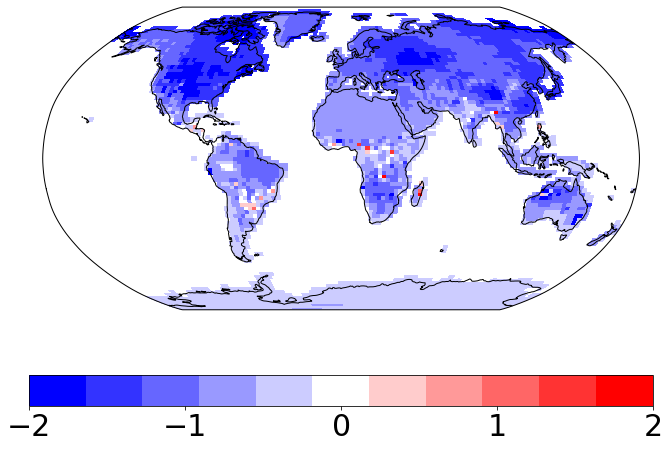

In [26]:
plt.rcParams.update({'font.size': 30})
quick_map.quick_map(delta_Ts_coupled[:,:,27],
                   cmap=plt.get_cmap("bwr",11), clims=[-2,2])
plt.savefig('delta_ra_medlynintercept.png')

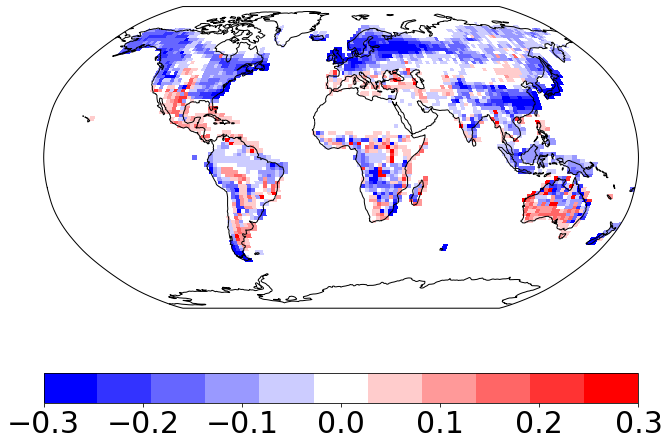

In [27]:
plt.rcParams.update({'font.size': 30})
quick_map.quick_map(deltas_Ts_rs_offline[:,:,27],
                   cmap=plt.get_cmap("bwr",11), clims=[-0.3,0.3])
plt.savefig('delta_ra_medlynintercept.png')

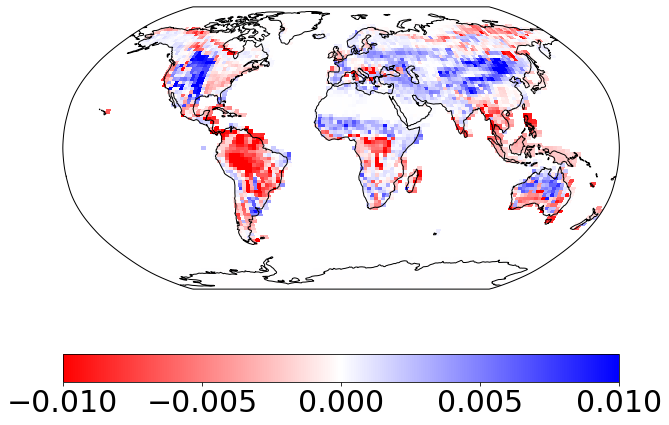

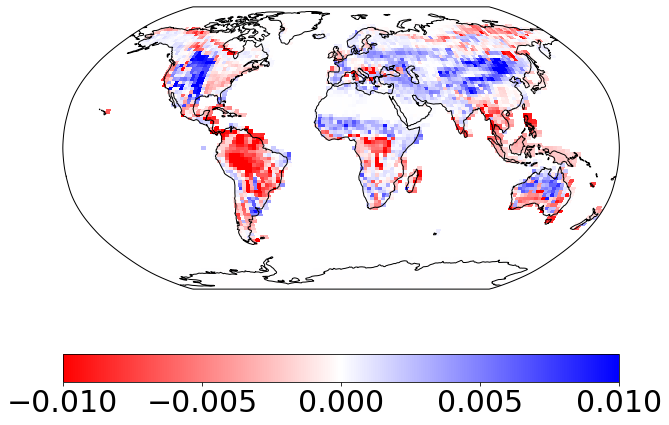

In [28]:

quick_map.quick_map(delta_albedo_offline[:,:,27],
                   cmap=plt.cm.bwr_r, clims=[-0.01,0.01])

# Compare maps

In [ ]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 6})
for i in np.arange(0,36):
    plt.subplot(6,6,i+1)
    plt.pcolormesh((delta_Ts_offline[:,:,i])==0)
    plt.title(crosswalk.description.values[i],fontsize=6)

plt.tight_layout()
#plt.savefig('Coupled_spatial_pattern.png')

In [ ]:
i=7
plt.plot(delta_EF_offline[:,:,i].values.flatten(),
         deltas_rs_offline[:,:,i].values.flatten(),'.')
plt.xlim([-2,2])
plt.ylim([-300,300])
plt.xlabel('EF')
plt.ylabel('rs')
plt.grid()

In [ ]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 6})
for i in np.arange(0,36):
    plt.subplot(6,6,i+1)
    (deltas_rs_offline[:,:,i]).plot(vmax=100)
    plt.title(crosswalk.description.values[i],fontsize=6)

plt.tight_layout()
#plt.savefig('Coupled_spatial_pattern.png')

In [ ]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 6})
for i in np.arange(0,36):
    plt.subplot(6,6,i+1)
    (deltas_rs_offline[:,:,i]).plot(vmax=100)
    plt.title(crosswalk.description.values[i],fontsize=6)

plt.tight_layout()
#plt.savefig('Coupled_spatial_pattern.png')

In [ ]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 6})
for i in np.arange(0,36):
    plt.subplot(6,6,i+1)
    (deltas_Rnet_offline[:,:,i]).plot(vmax=2)
    plt.title(crosswalk.description.values[i],fontsize=6)

plt.tight_layout()
#plt.savefig('Coupled_spatial_pattern.png')

In [ ]:
np.abs(delta_albedo_offline).max(dim='ensemble_key').plot(vmax=0.03, cmap=plt.get_cmap("Greens",10))

In [ ]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 6})
for i in np.arange(0,36):
    plt.subplot(6,6,i+1)
    (deltas_ra_offline[:,:,i]).plot(vmax=10)
    plt.title(crosswalk.description.values[i],fontsize=6)

plt.tight_layout()
#plt.savefig('Coupled_spatial_pattern.png')

# Multiple linear regression at each point

### Define variables to use in regression

In [29]:
var1=delta_EF_offline
var2=delta_albedo_offline
var3=deltas_ra_offline #deltas_ra_offline
yvar=delta_Ts_coupled

var1_name='EF'
var2_name='albedo'
var3_name='ra'

In [30]:
var1=var1.where(~(np.isnan(var1)&~np.isnan(landfrac)),0)
var3=var3.where(~(np.isnan(var3)&~np.isnan(landfrac)),0)

### Check correlation between variables

In [31]:
# Make empty arrays for regression output
x1andx2=np.zeros(np.shape(delta_EF_offline[:,:,0]))
x1andx2[:]=np.nan

x1andx3=np.zeros(np.shape(delta_EF_offline[:,:,0]))
x1andx3[:]=np.nan

x2andx3=np.zeros(np.shape(delta_EF_offline[:,:,0]))
x2andx3[:]=np.nan

x1andY=np.zeros(np.shape(delta_EF_offline[:,:,0]))
x1andY[:]=np.nan

x2andY=np.zeros(np.shape(delta_EF_offline[:,:,0]))
x2andY[:]=np.nan

x3andY=np.zeros(np.shape(delta_EF_offline[:,:,0]))
x3andY[:]=np.nan

In [32]:
for i in np.arange(0,96):
    for j in np.arange(0,144):
        if ~np.isnan(landfrac[i,j].values):
            x1andx2[i,j]=np.corrcoef(var1[i,j,:],var2[i,j,:])[0,1]
            x1andx3[i,j]=np.corrcoef(var1[i,j,:],var3[i,j,:])[0,1]
            x2andx3[i,j]=np.corrcoef(var2[i,j,:],var3[i,j,:])[0,1]
            x1andY[i,j]=np.corrcoef(var1[i,j,:],yvar[i,j,:])[0,1]
            x2andY[i,j]=np.corrcoef(var2[i,j,:],yvar[i,j,:])[0,1]
            x3andY[i,j]=np.corrcoef(var3[i,j,:],yvar[i,j,:])[0,1]

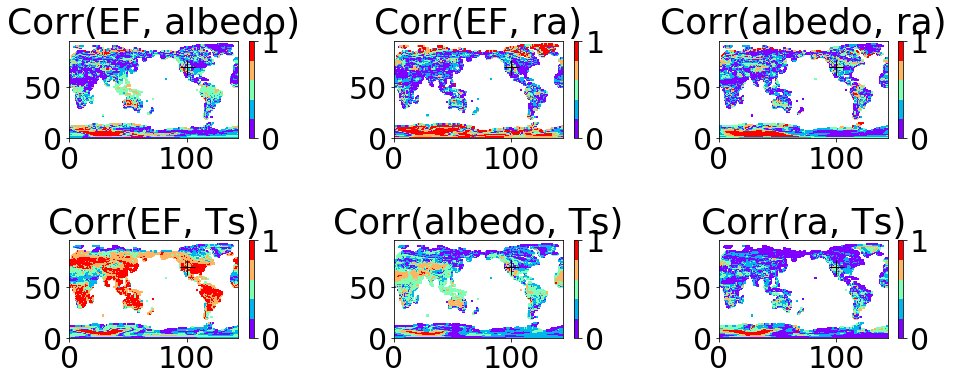

In [33]:
vmin=0
vmax=1
i=70
j=100
cmap=plt.cm.get_cmap("rainbow",5)

plt.figure(figsize=(14,6))
plt.subplot(2,3,1)
plt.pcolormesh(np.abs(x1andx2),cmap=cmap,vmin=vmin, vmax=vmax)
plt.plot(j,i,'+k',markersize=15)
plt.title('Corr('+var1_name+', '+var2_name+')')
plt.colorbar()
plt.subplot(2,3,2)
plt.pcolormesh(np.abs(x1andx3),cmap=cmap,vmin=vmin, vmax=vmax)
plt.title('Corr('+var1_name+', '+var3_name+')')
plt.plot(j,i,'+k',markersize=15)
plt.colorbar()
plt.subplot(2,3,3)
plt.pcolormesh(np.abs(x2andx3),cmap=cmap,vmin=vmin, vmax=vmax)
plt.title('Corr('+var2_name+', '+var3_name+')')
plt.plot(j,i,'+k',markersize=15)
plt.colorbar()
plt.subplot(2,3,4)
plt.pcolormesh(np.abs(x1andY),cmap=cmap,vmin=vmin, vmax=vmax)
plt.title('Corr('+var1_name+', '+'Ts'+')')
plt.plot(j,i,'+k',markersize=15)
plt.colorbar()
plt.subplot(2,3,5)
plt.pcolormesh(np.abs(x2andY),cmap=cmap,vmin=vmin, vmax=vmax)
plt.title('Corr('+var2_name+', '+'Ts'+')')
plt.plot(j,i,'+k',markersize=15)
plt.colorbar()
plt.subplot(2,3,6)
plt.pcolormesh(np.abs(x3andY),cmap=cmap,vmin=vmin, vmax=vmax)
plt.title('Corr('+var3_name+', '+'Ts'+')')
plt.plot(j,i,'+k',markersize=15)
plt.colorbar()

plt.tight_layout()

In [70]:
((x3andY*x3andY)*landweights).mean(dim=['lat','lon'])

<xarray.DataArray ()>
array(0.114048)

##### Check correlation between variables at a single point

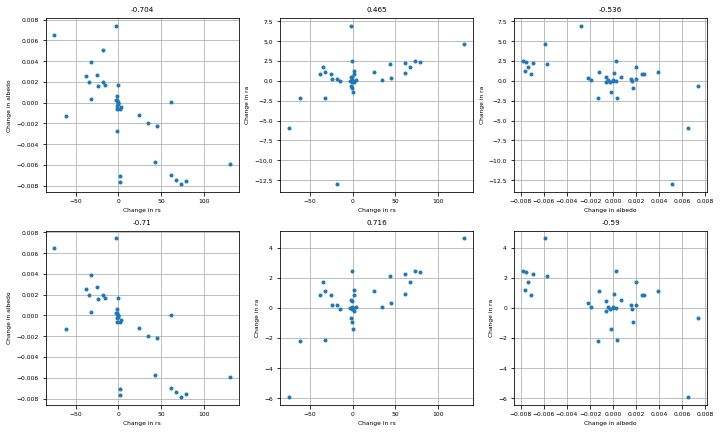

In [122]:
plt.figure(figsize=(10,6))

plt.subplot(2,3,1)
plt.plot((var1[i,j,:]),
         (var2[i,j,:]),'.')
plt.xlabel('Change in '+var1_name)
plt.ylabel('Change in '+var2_name)
plt.title(np.round((np.corrcoef((var1[i,j,:]),
         (var2[i,j,:]))[0,1]),3))
plt.grid()

plt.subplot(2,3,2)
plt.plot((var1[i,j,:]),
         (var3[i,j,:]),'.')
plt.xlabel('Change in '+var1_name)
plt.ylabel('Change in '+var3_name)
plt.title(np.round((np.corrcoef((var1[i,j,:]),
         (var3[i,j,:]))[0,1]),3))
plt.grid()

plt.subplot(2,3,3)
plt.plot((var2[i,j,:]),
         (var3[i,j,:]),'.')
plt.xlabel('Change in '+var2_name)
plt.ylabel('Change in '+var3_name)
plt.title(np.round((np.corrcoef((var2[i,j,:]),
         (var3[i,j,:]))[0,1]),3))
plt.grid()

plt.subplot(2,3,4)
plt.plot((var1[i,j,:-2]),
         (var2[i,j,:-2]),'.')
plt.xlabel('Change in '+var1_name)
plt.ylabel('Change in '+var2_name)
plt.title(np.round((np.corrcoef((var1[i,j,:-2]),
         (var2[i,j,:-2]))[0,1]),3))
plt.grid()

plt.subplot(2,3,5)
plt.plot((var1[i,j,:-2]),
         (var3[i,j,:-2]),'.')
plt.xlabel('Change in '+var1_name)
plt.ylabel('Change in '+var3_name)
plt.title(np.round((np.corrcoef((var1[i,j,:-2]),
         (var3[i,j,:-2]))[0,1]),3))
plt.grid()

plt.subplot(2,3,6)
plt.plot((var2[i,j,:-2]),
         (var3[i,j,:-2]),'.')
plt.xlabel('Change in '+var2_name)
plt.ylabel('Change in '+var3_name)
plt.title(np.round((np.corrcoef((var2[i,j,:-2]),
         (var3[i,j,:-2]))[0,1]),3))
plt.grid()

plt.tight_layout()

### Do regression

In [86]:
# Make empty arrays for regression output
R2s=np.zeros(np.shape(delta_EF_offline[:,:,0]))
R2s[:]=np.nan

corrcoeff_1=np.zeros(np.shape(delta_EF_offline[:,:,0]))
corrcoeff_1[:]=np.nan

corrcoeff_2=np.zeros(np.shape(delta_EF_offline[:,:,0]))
corrcoeff_2[:]=np.nan

corrcoeff_3=np.zeros(np.shape(delta_EF_offline[:,:,0]))
corrcoeff_3[:]=np.nan

In [94]:
reglists=[]
for i in np.arange(0,96):
    print(i)
    reglist=[]
    for j in np.arange(0,144):
        #print(j)
        if ~np.isnan(landfrac[i,j].values):
            
            # Define multiple predictors and one predictant
            X = np.transpose(np.array([
                var1[i,j,:],
                               var2[i,j,:],
                            #   var3[i,j,:]
                              ]))
            y = yvar2[i,j,:]
            
            if False:#np.nansum(np.isnan(X))>0:
                reglist.append(None)
            else:

                # Create an instance of the LinearRegression class
                reg = LinearRegression()

                # Fit the model to the data
                reg.fit(X, y)

                # Calculate predicted y based on regression model
                y_pred=reg.predict(X)

                # Save the coefficients of the model
               # corrcoeff_1[i,j]=reg.coef_[0]
                #corrcoeff_2[i,j]=reg.coef_[1]
               # corrcoeff_3[i,j]=reg.coef_[2]

                # Save R2
                R2=(reg.score(X, y))
                R2s[i,j]=R2

                # Save regression
                reglist.append(reg)
        else:
            reglist.append(None)
    reglists.append(reglist)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95


In [95]:
(R2s*landweights).mean(dim=['lat','lon'])

<xarray.DataArray ()>
array(0.310808)

In [93]:
for i in np.arange(0,96):
    for j in np.arange(0,144):
        reg=reglists[i][j]
        if reg is not None:
            corrcoeff_1[i,j]=reg.coef_[0]
            corrcoeff_2[i,j]=reg.coef_[1]
            corrcoeff_3[i,j]=reg.coef_[2]

IndexError: index 2 is out of bounds for axis 0 with size 2

In [242]:
#TEMPORARY

import statsmodels.api as sm
from scipy import stats
i=70
j=100
X = np.transpose(np.array([delta_EF_coupled[i,j,:],
                               delta_albedo_coupled[i,j,:],
                               deltas_ra_offline[i,j,:]
                              ]))
y = delta_Ts_coupled[i,j,:]

#X2 = sm.add_constant(X)
est = sm.OLS(y.values, X)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              228.8
Date:                Thu, 16 Mar 2023   Prob (F-statistic):                    3.77e-22
Time:                        16:55:07   Log-Likelihood:                          7.8003
No. Observations:                  36   AIC:                                     -9.601
Df Residuals:                      33   BIC:                                     -4.850
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [36]:
corrcoeff_1_xr=xr.DataArray(corrcoeff_1,
            dims=("lat", "lon"),
    coords=[('lat',delta_EF_offline.lat),
            ('lon',delta_EF_offline.lon)])

corrcoeff_2_xr=xr.DataArray(corrcoeff_2,
            dims=("lat", "lon"),
    coords=[('lat',delta_EF_offline.lat),
            ('lon',delta_EF_offline.lon)])

corrcoeff_3_xr=xr.DataArray(corrcoeff_3,
            dims=("lat", "lon"),
    coords=[('lat',delta_EF_offline.lat),
            ('lon',delta_EF_offline.lon)])

R2s_xr=xr.DataArray(R2s,
            dims=("lat", "lon"),
    coords=[('lat',delta_EF_offline.lat),
            ('lon',delta_EF_offline.lon)])

### Plot results

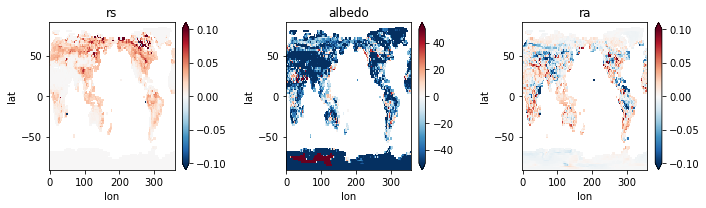

In [39]:
# Plot regression coefficients

plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
corrcoeff_1_xr.plot(vmax=0.1)
plt.title(var1_name)

plt.subplot(1,3,2)
corrcoeff_2_xr.plot(vmax=50)
plt.title(var2_name)

plt.subplot(1,3,3)
corrcoeff_3_xr.plot(vmax=0.1)
plt.title(var3_name)

plt.tight_layout()

In [40]:
# How much of variance regression can explain

#R2s_xr.plot(cmap=plt.cm.get_cmap("rainbow",10), vmax=1)
R2s_xr.plot(cmap=plt.cm.get_cmap("rainbow",10), vmin=0, vmax=1)#,R2s_xr.lat, R2s_xr.lon)

In [52]:
y_pred_var1=corrcoeff_1_xr*var1
y_pred_var2=corrcoeff_2_xr*var2
y_pred_var3=corrcoeff_3_xr*var3
y_pred=y_pred_var1+y_pred_var2+y_pred_var3

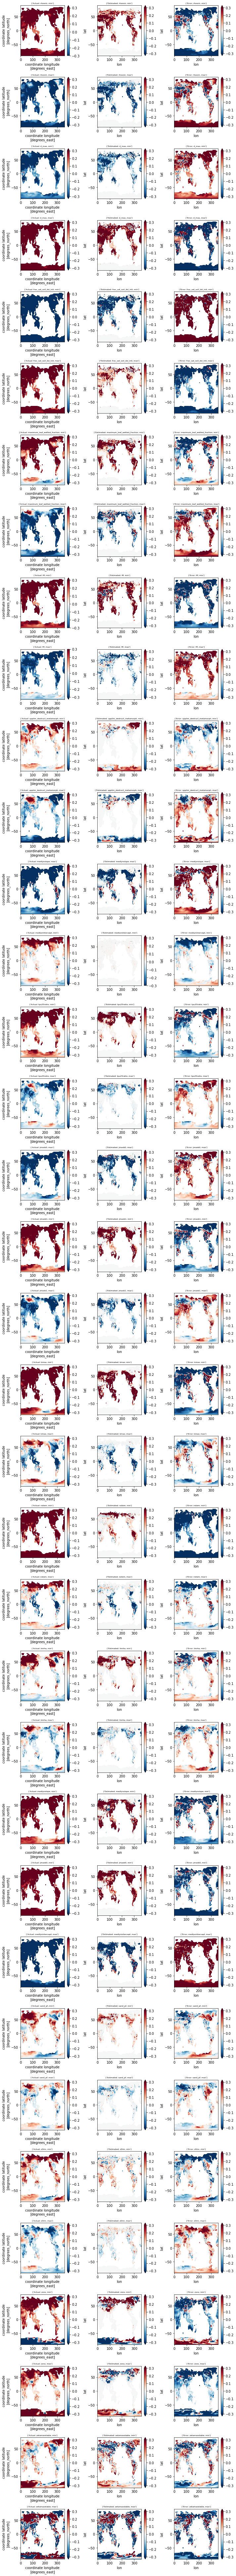

In [53]:
diff=y_pred-yvar
num_vars=36
plt.figure(figsize=(10,3*num_vars))

for i in np.arange(0,num_vars):
    i_ensemble_key=yvar[:,:,i].ensemble_key.values
    desc=crosswalk.description.values[crosswalk.key_coupledPPE=="COUP"+str(i_ensemble_key)]


    plt.subplot(num_vars,3,3*i+1)
    yvar[:,:,i].plot(vmax=0.3)
    plt.title('Actual: '+desc,fontsize=6)
    plt.subplot(num_vars,3,3*i+2)
    y_pred[:,:,i].plot(vmax=0.3)
    plt.title('Estimated: '+desc,fontsize=6)
    plt.subplot(num_vars,3,3*i+3)
    diff[:,:,i].plot(vmax=0.3)
    plt.title('Error: '+desc,fontsize=6)
    
plt.tight_layout()

In [54]:
SST = ((yvar - yvar.mean(dim='ensemble_key'))**2).sum(dim='ensemble_key')
SSReg = ((y_pred - yvar.mean(dim='ensemble_key'))**2).sum(dim='ensemble_key')
Rsquared = SSReg[0:]/SST[0:]

SSReg1 = ((y_pred_var1 - yvar.mean(dim='ensemble_key'))**2).sum(dim='ensemble_key')
Rsquared1 = SSReg1[0:]/SST[0:]

SSReg2 = ((y_pred_var2 - yvar.mean(dim='ensemble_key'))**2).sum(dim='ensemble_key')
Rsquared2 = SSReg2[0:]/SST[0:]

SSReg3 = ((y_pred_var3 - yvar.mean(dim='ensemble_key'))**2).sum(dim='ensemble_key')
Rsquared3 = SSReg3[0:]/SST[0:]

In [43]:
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
Rsquared1.plot(vmin=0, vmax=1,cmap=plt.cm.get_cmap("rainbow",10))
plt.title(var1_name)
plt.subplot(1,3,2)
Rsquared2.plot(vmin=0, vmax=1,cmap=plt.cm.get_cmap("rainbow",10))
plt.title(var2_name)
plt.subplot(1,3,3)
Rsquared3.plot(vmin=0, vmax=1,cmap=plt.cm.get_cmap("rainbow",10))
plt.title(var3_name)
plt.tight_layout()

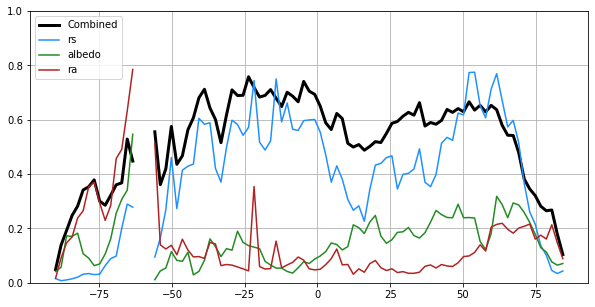

In [51]:
plt.figure(figsize=(10,5))
plt.plot(Rsquared.lat, Rsquared.mean(dim='lon'),'-k',linewidth=3,label='Combined')
plt.plot(Rsquared1.lat, Rsquared1.mean(dim='lon'),'-',color='dodgerblue', label='rs')
plt.plot(Rsquared2.lat, Rsquared2.mean(dim='lon'),'-', color='forestgreen',label='albedo')
plt.plot(Rsquared3.lat, Rsquared3.mean(dim='lon'),'-',color='firebrick', label='ra')
plt.ylim([0,1])
plt.grid()
plt.legend()

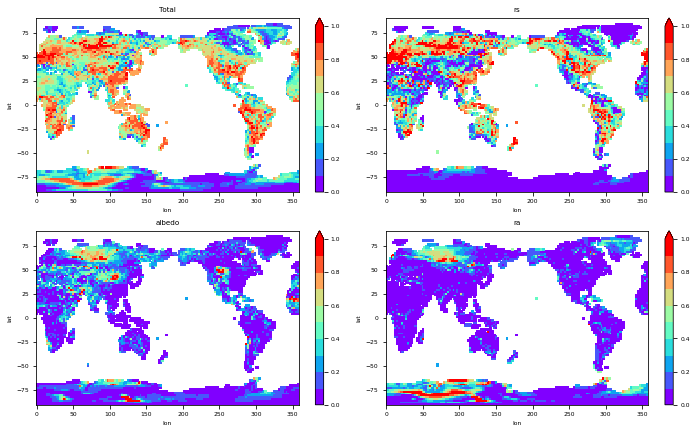

In [116]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
Rsquared.plot(vmin=0, vmax=1,cmap=plt.cm.get_cmap("rainbow",10))
plt.title('Total')
plt.subplot(2,2,2)
Rsquared1.plot(vmin=0, vmax=1,cmap=plt.cm.get_cmap("rainbow",10))
plt.title(var1_name)
plt.subplot(2,2,3)
Rsquared2.plot(vmin=0, vmax=1,cmap=plt.cm.get_cmap("rainbow",10))
plt.title(var2_name)
plt.subplot(2,2,4)
Rsquared3.plot(vmin=0, vmax=1,cmap=plt.cm.get_cmap("rainbow",10))
plt.title(var3_name)
plt.tight_layout()

# Look at sign change comparison

In [412]:
ratio=delta_Ts_coupled/delta_Ts_offline
amplifying_count=((ratio>=1)&np.isfinite(ratio)).sum(dim=['lat','lon'])
diminishing_count=((ratio>=0)&(ratio<1)&np.isfinite(ratio)).sum(dim=['lat','lon'])
switch_sign_count=((ratio<0)&np.isfinite(ratio)).sum(dim=['lat','lon'])
no_offline_change=(delta_Ts_offline==0).sum(dim=['lat','lon'])
no_offline_change_butwarms=((delta_Ts_offline==0)&(ratio>0)).sum(dim=['lat','lon'])
no_offline_change_butcools=((delta_Ts_offline==0)&(ratio<0)).sum(dim=['lat','lon'])
crosswalk['amplifying_count']=amplifying_count*100/5666
crosswalk['diminishing_count']=diminishing_count*100/5666
crosswalk['switch_sign_count']=switch_sign_count*100/5666
crosswalk['no_offline_change']=no_offline_change*100/5666
crosswalk['no_offline_change_butcools']=no_offline_change_butcools*100/5666
crosswalk['no_offline_change_butwarms']=no_offline_change_butwarms*100/5666

In [434]:
ratio=delta_Ts_coupled/delta_Ts_offline
amplifying_count=(((ratio>=1)&np.isfinite(ratio))*landweights).mean(dim=['lat','lon'])
diminishing_count=(((ratio>=0)&(ratio<1)&np.isfinite(ratio))*landweights).mean(dim=['lat','lon'])
switch_sign_count=(((ratio<0)&np.isfinite(ratio))*landweights).mean(dim=['lat','lon'])
no_offline_change=((delta_Ts_offline==0)*landweights).mean(dim=['lat','lon'])
no_offline_change_butwarms=(((delta_Ts_offline==0)&(ratio>0))*landweights).mean(dim=['lat','lon'])
no_offline_change_butcools=(((delta_Ts_offline==0)&(ratio<0))*landweights).mean(dim=['lat','lon'])
crosswalk['amplifying_count']=amplifying_count*100#/5666
crosswalk['diminishing_count']=diminishing_count*100#/5666
crosswalk['switch_sign_count']=switch_sign_count*100#/5666
crosswalk['no_offline_change']=no_offline_change*100#/5666
crosswalk['no_offline_change_butcools']=no_offline_change_butcools*100#/5666
crosswalk['no_offline_change_butwarms']=no_offline_change_butwarms*100#/5666

In [435]:
amplifying_count+diminishing_count+switch_sign_count+no_offline_change_butwarms+no_offline_change_butcools

<xarray.DataArray (ensemble_key: 36)>
array([1.000004, 1.000005, 1.      , 1.000005, 1.000001, 1.000004, 1.      ,
       0.999999, 1.      , 0.999924, 0.999999, 0.999998, 0.999999, 0.99992 ,
       0.999997, 0.999997, 0.999998, 0.999998, 0.999998, 0.999997, 0.999998,
       0.999998, 0.999998, 0.999999, 0.999614, 0.999998, 0.999997, 0.999997,
       0.999998, 0.999998, 0.999997, 0.999996, 0.999998, 0.999999, 0.999997,
       0.999997], dtype=float32)
Coordinates:
  * ensemble_key  (ensemble_key) object '0001' '0037' '0007' ... '0011' '0012'

In [436]:
crosswalk['diminish_or_switch_sign']=crosswalk.switch_sign_count+crosswalk.diminishing_count
crosswalk['amplifying']=crosswalk.switch_sign_count+crosswalk.diminishing_count

In [437]:
crosswalk_sorted=crosswalk.sort_values(by='amplifying_count',ascending=False)

In [438]:
half_of_change=(100-crosswalk_sorted.no_offline_change.values)/2

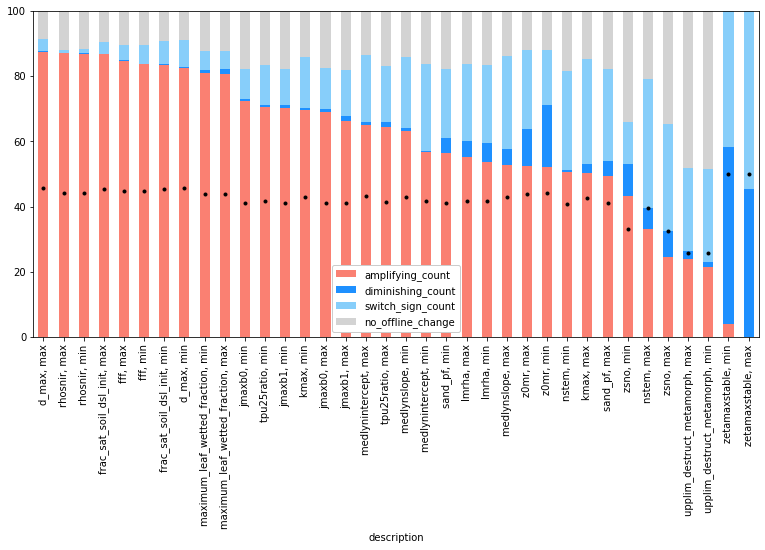

In [439]:
#plt.figure()
crosswalk_sorted.plot.bar(y=['amplifying_count',
                             #'no_offline_change_butwarms',
                      'diminishing_count',
                             #'no_offline_change_butcools',
                      'switch_sign_count',
                      'no_offline_change'
                            ], x='description',stacked=True,
                  colors=['salmon','dodgerblue','lightskyblue','lightgrey'],
                         # alpha=[1,1,1,1,0.2,0.2],
                  figsize=(13,6))
plt.ylim([0,100])
plt.plot(np.arange(0,36),half_of_change,'.k')
plt.legend(framealpha=1)

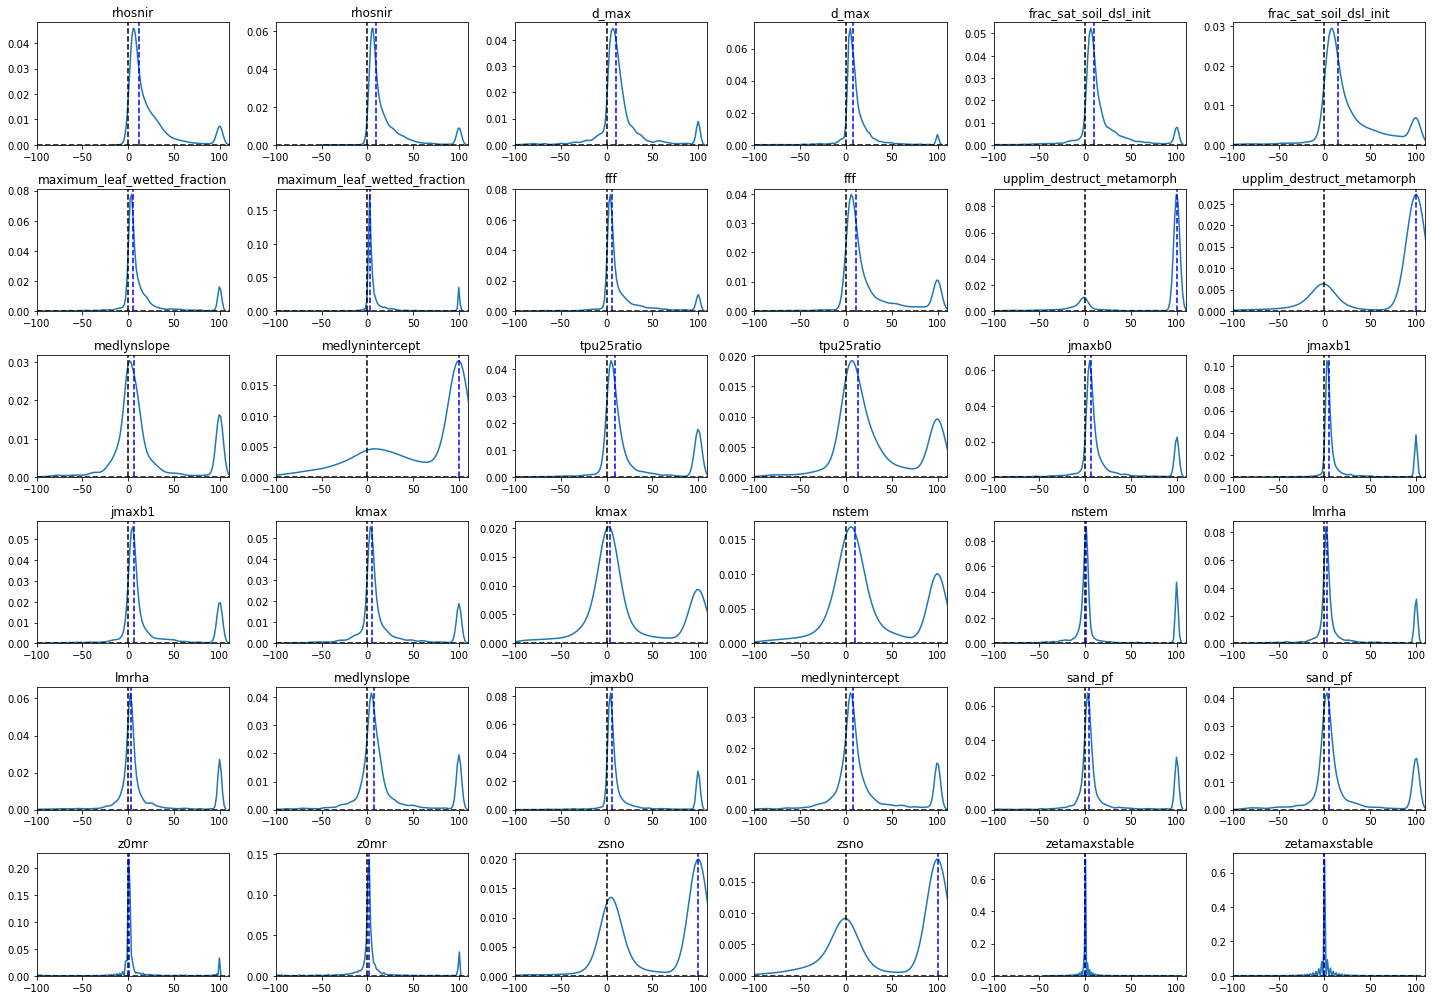

In [343]:
#0-13, 14-34
# 13, 34-36
plt.figure(figsize=(20,14))
for i in np.arange(0,36):
    plt.subplot(6,6,i+1)
    ratio=(delta_Ts_coupled/delta_Ts_offline)[:,:,i]
    ratio_cutoff=ratio.where(np.abs(ratio)<=100,100).where(np.abs(ratio)>=-100,-100).where(~np.isnan(ratio)).where(np.abs(ratio_cutoff.lat)<=60)
    ratio_cutoff_flat=ratio_cutoff.values.flatten()
    ratio=ratio_cutoff_flat
    ratio_nonan=ratio[~np.isnan(ratio)&np.isfinite(ratio)]

    sns.distplot(ratio_nonan, hist=False)#, bins=np.arange(-100,100,10))
    plt.axvline(x=0,linestyle='--',color='k')
    plt.axhline(y=0,linestyle='--',color='k')
    plt.xlim([-100,110])
    plt.tight_layout()
    plt.axvline(x=np.nanmedian(ratio_nonan),linestyle='--',color='b')
    plt.title(crosswalk.param.values[i])
plt.tight_layout()
#plt.ylim([0,0.1])

### Scatter plots

##### Plot correlations globally

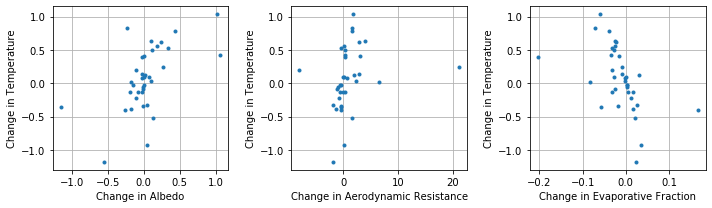

In [73]:
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.plot((deltas_Rnet_offline*landweights).mean(dim=['lat','lon']),
         (delta_Ts_coupled*landweights).mean(dim=['lat','lon']),'.')
plt.xlabel('Change in Albedo')
plt.ylabel('Change in Temperature')
plt.grid()

plt.subplot(1,3,2)
plt.plot((deltas_ra_offline*landweights).mean(dim=['lat','lon']),
         (delta_Ts_coupled*landweights).mean(dim=['lat','lon']),'.')
plt.xlabel('Change in Aerodynamic Resistance')
plt.ylabel('Change in Temperature')
plt.grid()

plt.subplot(1,3,3)
plt.plot((delta_EF_offline*landweights).mean(dim=['lat','lon']),
         (delta_Ts_coupled*landweights).mean(dim=['lat','lon']),'.')
plt.xlabel('Change in Evaporative Fraction')
plt.ylabel('Change in Temperature')
plt.grid()

plt.tight_layout()

##### Plot correlations for a single point

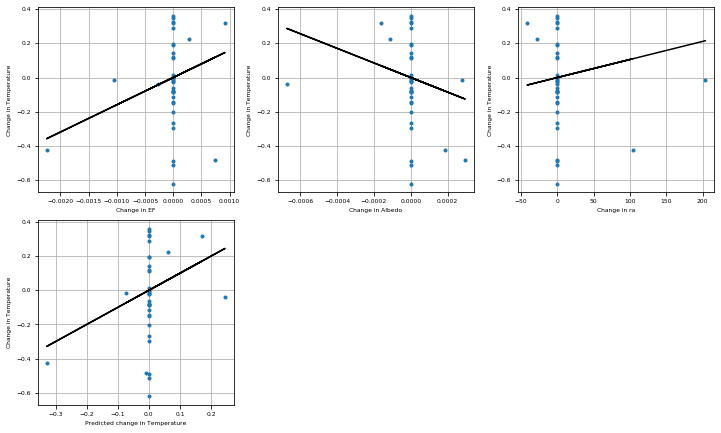

In [204]:
i=0
j=0

y_pred=(corrcoeff_1[i,j]*var1[i,j]+
        corrcoeff_2[i,j]*var2[i,j]+
        corrcoeff_3[i,j]*var3[i,j])

plt.figure(figsize=(10,6))
plt.subplot(2,3,1)
plt.plot((var1[i,j,:]),
         (delta_Ts_coupled[i,j,:]),'.')
plt.plot((var1[i,j,:]),
         (corrcoeff_1[i,j]*var1[i,j,:]),'-k')
plt.xlabel('Change in EF')
plt.ylabel('Change in Temperature')
plt.grid()

plt.subplot(2,3,2)
plt.plot((var2[i,j,:]),
         (delta_Ts_coupled[i,j,:]),'.')
plt.plot((var2[i,j,:]),
         (corrcoeff_2[i,j]*var2[i,j,:]),'-k')
plt.xlabel('Change in Albedo')
plt.ylabel('Change in Temperature')
plt.grid()

plt.subplot(2,3,3)
plt.plot((var3[i,j,:]),
         (delta_Ts_coupled[i,j,:]),'.')
plt.plot((var3[i,j,:]),
         (corrcoeff_3[i,j]*var3[i,j,:]),'-k')
plt.xlabel('Change in ra')
plt.ylabel('Change in Temperature')
plt.grid()


plt.subplot(2,3,4)
plt.plot((y_pred),
         (delta_Ts_coupled[i,j,:]),'.')
plt.plot((y_pred),
         (y_pred),'-k')
plt.xlabel('Predicted change in Temperature')
plt.ylabel('Change in Temperature')
plt.grid()

plt.tight_layout()

##### Correlations between variables at a single point

In [174]:
np.corrcoef(var1, var2)

ValueError: m has more than 2 dimensions

In [165]:
np.corrcoef()

array([[ 1.        , -0.04558747],
       [-0.04558747,  1.        ]])

### Do offline regression

In [31]:
R2s_offline=np.zeros(np.shape(delta_EF_offline[:,:,0]))
R2s_offline[:]=np.nan

corrcoeff_1_offline=np.zeros(np.shape(delta_EF_offline[:,:,0]))
corrcoeff_1_offline[:]=np.nan

corrcoeff_2_offline=np.zeros(np.shape(delta_EF_offline[:,:,0]))
corrcoeff_2_offline[:]=np.nan

corrcoeff_3_offline=np.zeros(np.shape(delta_EF_offline[:,:,0]))
corrcoeff_3_offline[:]=np.nan

In [102]:
reglists_offline=[]
for i in np.arange(0,96):
    print(i)
    reglist=[]
    for j in np.arange(0,144):
        #print(j)
        if ~np.isnan(landfrac[i,j].values):
            nancount=0
            if nancount>0:
                #print('skip')
                reglist.append(np.nan)
                
            else:
                X = np.transpose(np.array([deltas_Rnet_offline[i,j,:-2],
                                           deltas_ra_offline[i,j,:-2],
                                           delta_EF_offline[i,j,:-2]
                                  ]))
                y = delta_Ts_offline[i,j,:-2] #delta_Ts_coupled #delta_Ts_offline#

                # Create an instance of the LinearRegression class
                reg = LinearRegression()

                # Fit the model to the data
                reg.fit(X, y)

                # Print the coefficients of the model
                corrcoeff_1_offline[i,j]=reg.coef_[0]
                corrcoeff_2_offline[i,j]=reg.coef_[1]
                corrcoeff_3_offline[i,j]=reg.coef_[2]
                #for k in (reg.coef_):
                #    print(k)

                y_pred=reg.predict(X)

                #print('R2')
                R2=(reg.score(X, y))
                R2s_offline[i,j]=R2

                reglist.append(reg)
        else:
            reglist.append(np.nan)
    reglists_offline.append(reglist)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95


# Compare changes in evaporative fraction

In [78]:
both_increase=(delta_EF_offline>0)*(delta_EF_coupled>0)
both_decrease=(delta_EF_offline<0)*(delta_EF_coupled<0)
no_offline_change=(delta_EF_offline==0)
opposite_sign=(1-(both_increase+both_decrease+no_offline_change)).where(~np.isnan(delta_EF_offline))

In [79]:
opposite_sign=opposite_sign.where(np.abs(delta_EF_coupled)>0.001)#.plot()

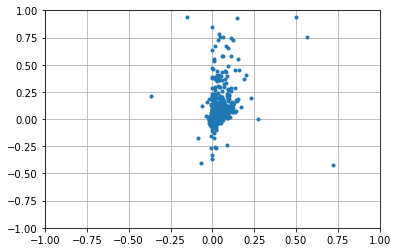

In [97]:
plt.plot(delta_EF_offline[:,:,i].values.flatten(),
         delta_EF_coupled[:,:,i].values.flatten(),'.')
plt.ylim([-1,1])
plt.xlim([-1,1])
plt.grid()

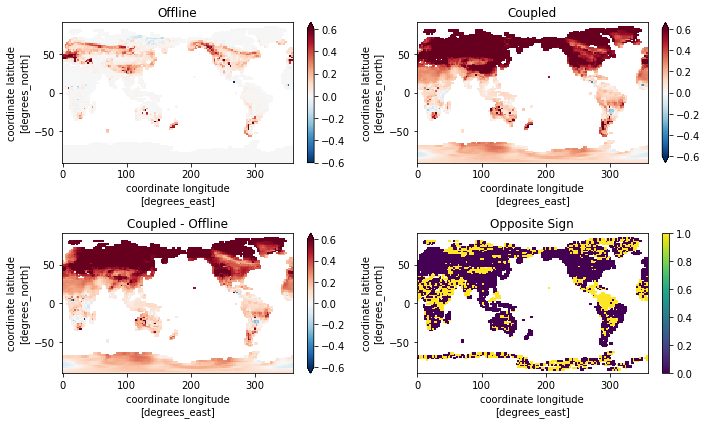

In [106]:
plt.figure(figsize=(10,6))
i=14
vmax=0.6
plt.subplot(2,2,1)
delta_Ts_offline[:,:,i].plot(vmax=vmax)
plt.title('Offline')
plt.subplot(2,2,2)
delta_Ts_coupled[:,:,i].plot(vmax=vmax)
plt.title('Coupled')
plt.subplot(2,2,3)
(delta_Ts_coupled[:,:,i]-delta_Ts_offline[:,:,i]).plot(vmax=vmax)
plt.title('Coupled - Offline')
plt.subplot(2,2,4)
(opposite_sign[:,:,i]).plot()
plt.title('Opposite Sign')
plt.tight_layout()

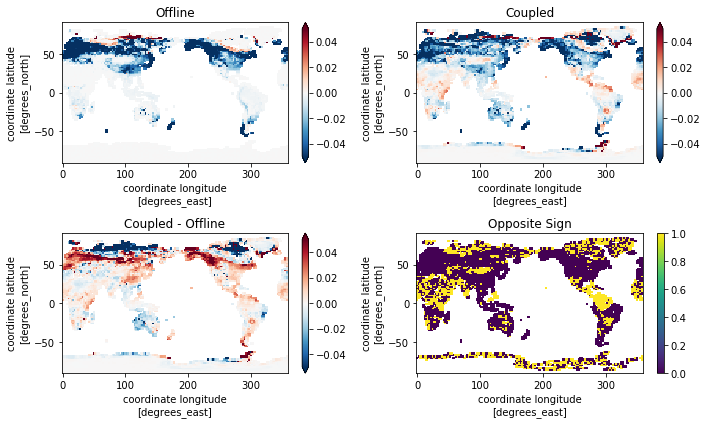

In [102]:
plt.figure(figsize=(10,6))
i=14
vmax=0.05
plt.subplot(2,2,1)
delta_EF_offline[:,:,i].plot(vmax=vmax)
plt.title('Offline')
plt.subplot(2,2,2)
delta_EF_coupled[:,:,i].plot(vmax=vmax)
plt.title('Coupled')
plt.subplot(2,2,3)
(delta_EF_coupled[:,:,i]-delta_EF_offline[:,:,i]).plot(vmax=vmax)
plt.title('Coupled - Offline')
plt.subplot(2,2,4)
(opposite_sign[:,:,i]).plot()
plt.title('Opposite Sign')
plt.tight_layout()

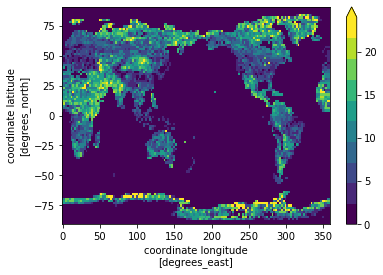

In [92]:
opposite_sign.sum(dim='ensemble_key').plot(cmap=cmap, vmax=24)

# Compare global-scale albedo changes

### Albedo

In [49]:
SWin_global_ref=(basecase_lnd_offline_FSDS.FSDS[60*12:,:,:].mean(dim='time'))
SWabs_global_ref=(basecase_lnd_offline_FSA.FSA[60*12:,:,:].mean(dim='time'))
albedo_ref=1-(SWabs_global_ref/SWin_global_ref)

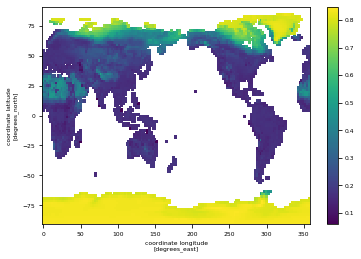

In [50]:
albedo_ref.plot()

In [51]:
i=20
ds=ensemble_offline_FSDS[i]
SWin=ds.FSDS
SWabs=ensemble_offline_FSA[i].FSA
SWin_global=(SWin[60*12:,:,:].mean(dim='time'))
SWabs_global=(SWabs[60*12:,:,:].mean(dim='time'))
albedo=1-(SWabs_global/SWin_global).load()
delta_albedo=albedo-albedo_ref
delta_albedo_globalavg=(delta_albedo*landweights).mean(dim=['lat','lon'])

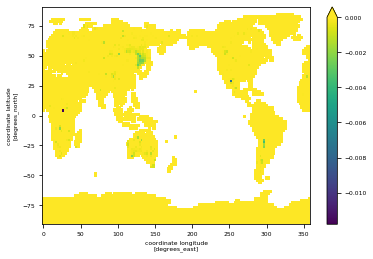

In [52]:
delta_albedo.plot(vmax=0.0)

In [53]:
SWin_global_ref=(basecase_lnd_offline_FSDS.FSDS[60*12:,:,:].mean(dim='time'))
SWabs_global_ref=(basecase_lnd_offline_FSA.FSA[60*12:,:,:].mean(dim='time'))
albedo_ref=1-(SWabs_global_ref/SWin_global_ref)

delta_albedos_local=[]
for i,ds in enumerate(ensemble_offline_FSDS):
    print(i)
    SWin=ds.FSDS
    SWabs=ensemble_offline_FSA[i].FSA
    SWin_global=(SWin[60*12:,:,:].mean(dim='time'))
    SWabs_global=(SWabs[60*12:,:,:].mean(dim='time'))
    albedo=1-(SWabs_global/SWin_global).load()
    delta_albedo=albedo-albedo_ref
    delta_albedo_globalavg=(delta_albedo*landweights).mean(dim=['lat','lon'])
    delta_albedos_local.append(delta_albedo_globalavg)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [54]:
SWin_global_ref=(landweights*basecase_lnd_offline_FSDS.FSDS[60*12:,:,:].mean(dim='time')).mean(dim=['lat','lon'])
SWabs_global_ref=(landweights*basecase_lnd_offline_FSA.FSA[60*12:,:,:].mean(dim='time')).mean(dim=['lat','lon'])
albedo_ref=1-(SWabs_global_ref/SWin_global_ref)

global_albedos=[]
for i,ds in enumerate(ensemble_offline_FSDS):
    print(i)
    SWin=ds.FSDS
    SWabs=ensemble_offline_FSA[i].FSA
    SWin_global=(landweights*SWin[60*12:,:,:].mean(dim='time')).mean(dim=['lat','lon'])
    SWabs_global=(landweights*SWabs[60*12:,:,:].mean(dim='time')).mean(dim=['lat','lon'])
    albedo=1-(SWabs_global/SWin_global).load()
    global_albedos.append(albedo)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


### Vegetation height

In [55]:
global_htops=[]
for i,ds in enumerate(ensemble_offline_HTOP):
    print(i)
    Htop=ensemble_offline_HTOP[i].HTOP
    Htop_global=(landweights*Htop[60*12:,:,:].mean(dim='time')).mean(dim=['lat','lon']).load()
    global_htops.append(Htop_global)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [56]:
HTOP_ref_local=(basecase_lnd_offline_HTOP.HTOP[60*12:,:,:].mean(dim='time'))

deltas_htops_local=[]
for i,ds in enumerate(ensemble_offline_HTOP):
    print(i)
    Htop=ensemble_offline_HTOP[i].HTOP
    Htop_global=(Htop[60*12:,:,:].mean(dim='time'))
    delta_htop_local=((Htop_global-HTOP_ref_local)*landweights).mean(dim=['lat','lon']).load()
    deltas_htops_local.append(delta_htop_local)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [57]:
HTOP_ref=(landweights*basecase_lnd_offline_HTOP.HTOP[60*12:,:,:].mean(dim='time')).mean(dim=['lat','lon'])

### Evaporative fraction

In [58]:
SH_ref=(landweights*basecase_lnd_offline_SH.FSH[60*12:,:,:].mean(dim='time')).mean(dim=['lat','lon'])
LH_ref=(landweights*basecase_lnd_offline_LH.EFLX_LH_TOT[60*12:,:,:].mean(dim='time')).mean(dim=['lat','lon'])
EF_ref=LH_ref/(SH_ref+LH_ref)

global_EF=[]
for i,ds in enumerate(ensemble_offline_LH):
    print(i)
    LH=ds.EFLX_LH_TOT
    SH=ensemble_offline_SH[i].FSH
    LH_global=(landweights*LH[60*12:,:,:].mean(dim='time')).mean(dim=['lat','lon'])
    SH_global=(landweights*SH[60*12:,:,:].mean(dim='time')).mean(dim=['lat','lon'])
    EF=(LH_global/(LH_global+SH_global)).load()
    global_EF.append(EF)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [59]:
SH_ref=(landweights*basecase_lnd_offline_SH.FSH[60*12:,:,:].mean(dim='time')).mean(dim=['lat','lon'])
LH_ref=(landweights*basecase_lnd_offline_LH.EFLX_LH_TOT[60*12:,:,:].mean(dim='time')).mean(dim=['lat','lon'])
EF_ref=LH_ref/(SH_ref+LH_ref)

In [60]:
ds=ensemble_offline_LH[20]
LH=ds.EFLX_LH_TOT
SH=ensemble_offline_SH[i].FSH
LH_global=(landweights*LH[60*12:,:,:].mean(dim='time')).mean(dim=['lat','lon'])
SH_global=(landweights*SH[60*12:,:,:].mean(dim='time')).mean(dim=['lat','lon'])
EF=(LH_global/(LH_global+SH_global)).load()

In [61]:
EF=LH[60*12:,:,:].mean(dim='time')/(LH[60*12:,:,:].mean(dim='time')+SH[60*12:,:,:].mean(dim='time'))
EF_map_ref=basecase_lnd_offline_LH.EFLX_LH_TOT[60*12:,:,:].mean(dim='time')/(basecase_lnd_offline_LH.EFLX_LH_TOT[60*12:,:,:].mean(dim='time')+
                                                                             basecase_lnd_offline_SH.FSH[60*12:,:,:].mean(dim='time'))

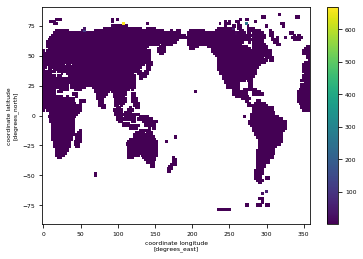

In [62]:
EF_map_ref.where(EF_map_ref>0.05).plot()

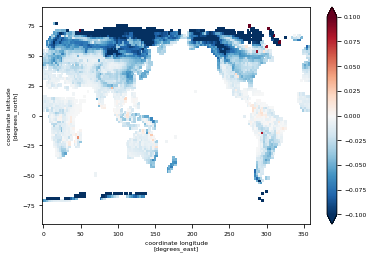

In [63]:
(EF-EF_map_ref.where(basecase_lnd_offline_LH.EFLX_LH_TOT[60*12:,:,:].mean(dim='time')>5)).plot(vmax=0.1, vmin=-0.1, cmap=plt.cm.RdBu_r)

In [64]:
SH_ref=(basecase_lnd_offline_SH.FSH[60*12:,:,:].mean(dim='time'))
LH_ref=(basecase_lnd_offline_LH.EFLX_LH_TOT[60*12:,:,:].mean(dim='time'))
EF_ref_local=LH_ref/(SH_ref+LH_ref)
EF_ref_local=EF_ref_local.where((SH_ref+LH_ref)>10)

deltas_EF_local=[]
for i,ds in enumerate(ensemble_offline_LH):
    print(i)
    LH=ds.EFLX_LH_TOT
    SH=ensemble_offline_SH[i].FSH
    LH_global=(LH[60*12:,:,:].mean(dim='time'))
    SH_global=(SH[60*12:,:,:].mean(dim='time'))
    EF=(LH_global/(LH_global+SH_global)).load()
    delta_EF_local=((EF-EF_ref_local)*landweights).mean(dim=['lat','lon']).load()
    deltas_EF_local.append(delta_EF_local)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


### Surface temperature

In [66]:
Ts_ref=(landweights*basecase_lnd_offline_Ts.TSKIN[60*12:,:,:].mean(dim='time')).mean(dim=['lat','lon'])
Ts_ref_offline=(landweights*basecase_lnd_offline_Ts.TSKIN[60*12:,:,:].mean(dim='time')).mean(dim=['lat','lon'])

global_Ts=[]
for i,ds in enumerate(ensemble_offline_Ts):
    print(i)
    Ts=ensemble_offline_Ts[i].TSKIN
    Ts_global=(landweights*Ts[60*12:,:,:].mean(dim='time')).mean(dim=['lat','lon'])
    global_Ts.append(Ts_global)
global_Ts_offline=global_Ts

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [67]:
Ts_ref=(landweights*basecase_lnd_coupled_Ts.TSKIN[60*12:,:,:].mean(dim='time')).mean(dim=['lat','lon'])
Ts_ref_coupled=(landweights*basecase_lnd_coupled_Ts.TSKIN[60*12:,:,:].mean(dim='time')).mean(dim=['lat','lon'])


global_Ts=[]
for i,ds in enumerate(ensemble_coupled_Ts):
    print(i)
    Ts=ensemble_coupled_Ts[i].TSKIN
    Ts_global=(landweights*Ts[60*12:,:,:].mean(dim='time')).mean(dim=['lat','lon'])
    global_Ts.append(Ts_global.load())
global_Ts_coupled=global_Ts

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


### Differences from baseline

In [68]:
deltas_albedo=np.array(global_albedos)-albedo_ref.values
deltas_EF=np.array(global_EF)-EF_ref.values
deltas_Ts_coupled=np.array(global_Ts_coupled)-Ts_ref_coupled.values
deltas_Ts_offline=np.array(global_Ts_offline)-Ts_ref_offline.values
deltas_htop=np.array(global_htops)-HTOP_ref.values

In [103]:
param_colors=['blue','blue', 'blue','blue',
        'purple', 'purple', 'purple', 'purple',
        'forestgreen', 'forestgreen', 'forestgreen',
        'lightseagreen', 'lightseagreen','lightseagreen',
              'goldenrod',
              'lightgreen',
        'orange','orange']

array([-0.5336523 ,  0.6136179 ,  1.012826  , -2.9850662 ,  3.5918653 ,
       -1.1785448 , -3.6111891 ,  2.6575625 , -5.1843615 ,  1.6179562 ,
        0.01895428, -0.00756383,  2.275139  , -0.02645254, -1.4736176 ,
        0.41629672,  2.0261526 , -3.2711089 ,  1.1823773 , -5.3209634 ,
        2.7259707 , -0.73723197,  1.4495194 , -0.93392134,  0.3043115 ,
       -3.1012714 , -2.791381  ,  4.0242014 , -0.31381845,  0.24055839,
       -0.14352202,  0.15701652, -0.32715797,  0.22926927,  1.7291784 ,
       -3.7563741 ], dtype=float32)

In [114]:
colors=['goldenrod',
        'goldenrod',
        'blue',
        'blue',
        'blue',
        'blue',
        'orange',
        'orange',
        'blue',
        'blue',
        'purple',
        'purple',
        'teal',
        'teal',
        'forestgreen',
        'forestgreen',
        'forestgreen',
        'forestgreen',
        'forestgreen',
        'teal',
        'teal',
        'orange',
        'orange',
        'lightseagreen',
        'lightseagreen',
        'teal',
        'forestgreen',
        'teal',
        'blue',
        'blue',
        'purple',
        'purple',
        'purple',
        'purple',
        'purple',
        'purple']

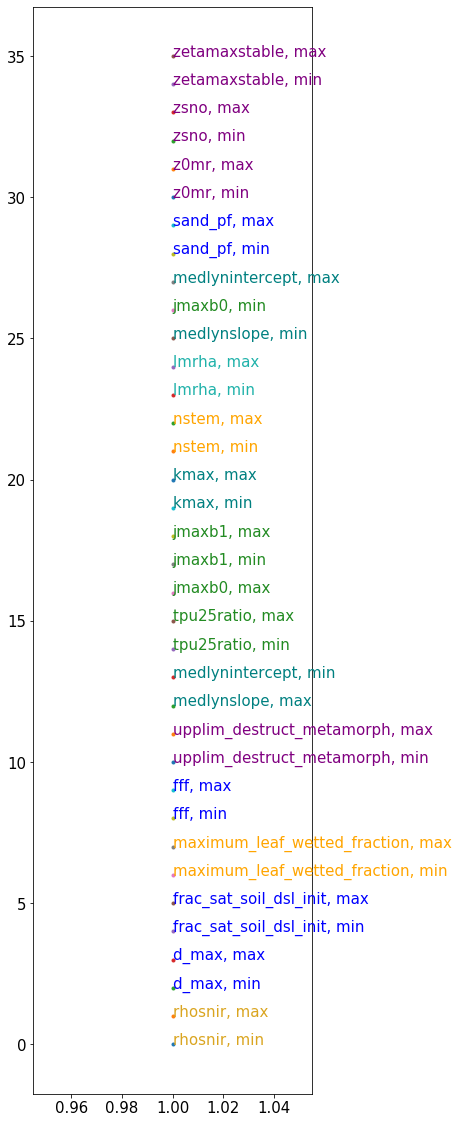

In [115]:
plt.figure(figsize=(5,20))
for i,text in enumerate(crosswalk.description):
    plt.plot(1,i,'.')
    plt.text(1,i,text,color=colors[i])

In [129]:
landweights

<xarray.DataArray ()>
array(1., dtype=float32)

<xarray.DataArray (ensemble_key: 36)>
array([ 3.174839e+00, -3.374584e+00, -4.275777e+01,  4.417683e+02,
       -5.032839e+01,  2.601268e+01,  1.842553e+01, -1.284284e+01,
        1.849903e+02, -3.028877e+01, -2.377503e-01,  2.372613e-01,
       -1.096592e+01,  5.858581e-01,  1.309943e+01, -2.613322e+00,
       -1.023585e+01,  3.174770e+01, -7.337196e+00,  2.215223e+01,
       -3.377307e+00,  1.402656e+00, -1.990147e+00,  9.175437e+00,
       -1.428643e+00,  2.588510e+01,  2.889632e+01, -2.409323e+01,
        2.424540e+00, -1.481626e+00,  3.162831e+00, -1.907725e+00,
        5.467195e-01, -1.958980e-01,  3.942620e+00,  1.447322e+01])
Coordinates:
  * ensemble_key  (ensemble_key) object '0001' '0037' '0007' ... '0011' '0012'

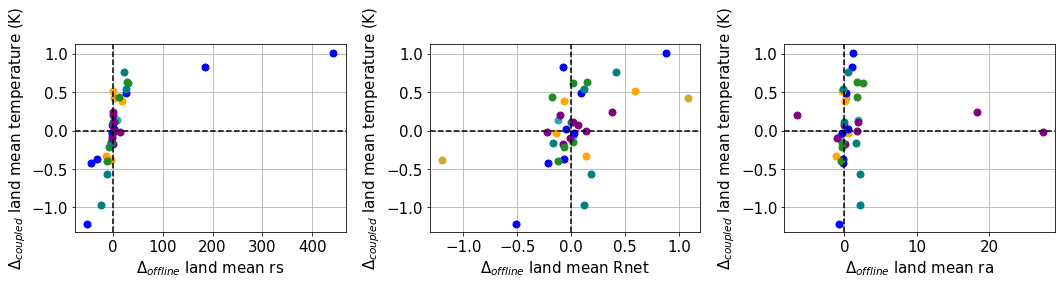

In [140]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
for i,text in enumerate(crosswalk.description):
    plt.plot((deltas_rs_offline*landweights).mean(dim=['lat','lon'])[i],deltas_Ts_coupled[i],'o',color=colors[i],markersize=7)
plt.grid()
plt.axhline(y=0,linestyle='--',color='k')
plt.axvline(x=0,linestyle='--',color='k')
plt.xlabel('$\Delta_{offline}$'+' land mean rs')
plt.ylabel('$\Delta_{coupled}$'+' land mean temperature (K)')

plt.subplot(1,3,2)
for i,text in enumerate(crosswalk.description):
    plt.plot((deltas_Rnet_offline*landweights).mean(dim=['lat','lon'])[i],deltas_Ts_coupled[i],'o',color=colors[i],markersize=7)
plt.grid()
plt.axhline(y=0,linestyle='--',color='k')
plt.axvline(x=0,linestyle='--',color='k')
plt.xlabel('$\Delta_{offline}$'+' land mean Rnet')
plt.ylabel('$\Delta_{coupled}$'+' land mean temperature (K)')

plt.subplot(1,3,3)
for i,text in enumerate(crosswalk.description):
    plt.plot((deltas_ra_offline*landweights).mean(dim=['lat','lon'])[i],deltas_Ts_coupled[i],'o',color=colors[i],markersize=7)
plt.grid()
plt.axhline(y=0,linestyle='--',color='k')
plt.axvline(x=0,linestyle='--',color='k')
plt.xlabel('$\Delta_{offline}$'+' land mean ra')
plt.ylabel('$\Delta_{coupled}$'+' land mean temperature (K)')

plt.tight_layout()

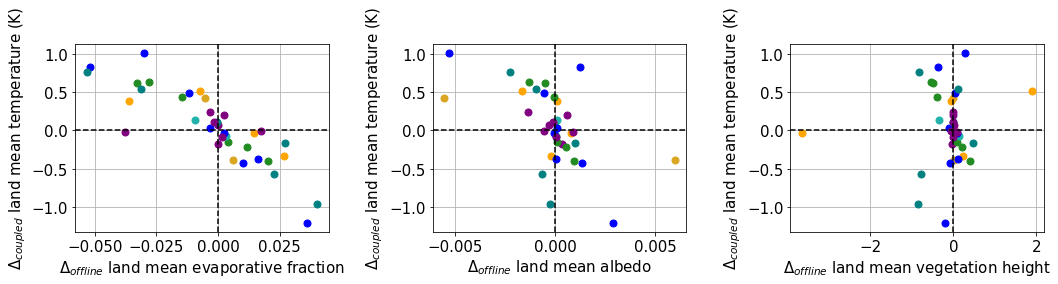

In [127]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
for i,text in enumerate(crosswalk.description):
    plt.plot(deltas_EF[i],deltas_Ts_coupled[i],'o',color=colors[i],markersize=7)
plt.grid()
plt.axhline(y=0,linestyle='--',color='k')
plt.axvline(x=0,linestyle='--',color='k')
plt.xlabel('$\Delta_{offline}$'+' land mean evaporative fraction')
plt.ylabel('$\Delta_{coupled}$'+' land mean temperature (K)')

plt.subplot(1,3,2)
for i,text in enumerate(crosswalk.description):
    plt.plot(deltas_albedo[i],deltas_Ts_coupled[i],'o',color=colors[i],markersize=7)
plt.grid()
plt.axhline(y=0,linestyle='--',color='k')
plt.axvline(x=0,linestyle='--',color='k')
plt.xlabel('$\Delta_{offline}$'+' land mean albedo')
plt.ylabel('$\Delta_{coupled}$'+' land mean temperature (K)')

plt.subplot(1,3,3)
for i,text in enumerate(crosswalk.description):
    plt.plot(deltas_htop[i],deltas_Ts_coupled[i],'o',color=colors[i],markersize=7)
plt.grid()
plt.axhline(y=0,linestyle='--',color='k')
plt.axvline(x=0,linestyle='--',color='k')
plt.xlabel('$\Delta_{offline}$'+' land mean vegetation height')
plt.ylabel('$\Delta_{coupled}$'+' land mean temperature (K)')

plt.tight_layout()

# Global Multiple linear regression

* multiple linear regression
* nonparametric recursive partitioning and regression method (Brei- man et al. 1984) to identify the most important land surface parameter for DTANN

In [39]:
from sklearn.linear_model import LinearRegression
import numpy as np
 
# Assume you have independent variables X and a dependent variable y
X = np.transpose(np.array([#GLOBAL AVERAGE OF CHANGES
                           delta_EF_offline,
                           delta_albedo_offline,
                           deltas_ra_offline,
                           
                           # CHANGES IN GLOBAL AVERAGES
                           #deltas_EF, 
                           #deltas_albedo, 
                           #deltas_htop,
    
    
                           #delta_Ts_offline
                          ]))
y = deltas_Ts_coupled #delta_Ts_coupled #delta_Ts_offline#

X=X#[:-2,:]
y=y#[:-2]
 
# Create an instance of the LinearRegression class
reg = LinearRegression()
 
# Fit the model to the data
reg.fit(X, y)
 
# Print the coefficients of the model
for i in (reg.coef_):
    print(i)
    
y_pred=reg.predict(X)

print('R2')
print(reg.score(X, y))

KeyboardInterrupt: 

In [44]:
FSA_global=(da_FSA_offline*landweights).mean(dim=['lat','lon'])
FSDS_global=(da_FSDS_offline*landweights).mean(dim=['lat','lon'])
FSR_global=FSDS_global-FSA_global
albedo_global=(FSR_global/FSDS_global)

SH_global=(da_SH_offline*landweights).mean(dim=['lat','lon'])
LH_global=(da_LH_offline*landweights).mean(dim=['lat','lon'])
EF_global=(LH_global/(SH_global+LH_global))

HTOP_global=((da_HTOP_offline*landweights).mean(dim=['lat','lon']))

Ts_global=((da_Ts_coupled*landweights).mean(dim=['lat','lon']))

In [45]:
# Albedo
FSR_offline_ref = FSDS_offline_ref-FSA_offline_ref
albedo_ref_offline_global=((FSR_offline_ref*landweights).mean(dim=['lat','lon'])/
                           (FSDS_offline_ref*landweights).mean(dim=['lat','lon']))

# Evaporative fraction
LH_offline_ref_global=(LH_offline_ref*landweights).mean(dim=['lat','lon'])
SH_offline_ref_global=(SH_offline_ref*landweights).mean(dim=['lat','lon'])
EF_offline_ref_global=LH_offline_ref_global/(LH_offline_ref_global+SH_offline_ref_global)


In [46]:
delta_Ts_global=Ts_global-(Ts_coupled_ref*landweights).mean(dim=['lat','lon'])
delta_HTOP_global=HTOP_global-(HTOP_offline_ref*landweights).mean(dim=['lat','lon'])
delta_EF_global=EF_global-EF_offline_ref_global
delta_albedo_global=albedo_global-albedo_ref_offline_global

In [47]:
delta_ra_global=(deltas_ra_offline*landweights).mean(dim=['lat','lon'])

In [48]:
d = {"EF": delta_EF_global, "ra": delta_ra_global, "albedo": delta_albedo_global,
    "Ts":delta_Ts_global}
df = pd.DataFrame(d)

In [64]:
colors=['goldenrod', 'goldenrod', 'skyblue', 'skyblue',
       'skyblue', 'skyblue',
       '#6CD2E9',
       '#6CD2E9', 'skyblue', 'skyblue',
       '#F8CBAD', '#F8CBAD',
       'forestgreen', 'forestgreen', 'lightseagreen',
       'lightseagreen', 'lightseagreen', 'lightseagreen', 'lightseagreen',
       'forestgreen', 'forestgreen', 'orange', 'orange', 'lightgreen',
       'lightgreen', 'forestgreen', 'lightseagreen',
       'forestgreen', 'skyblue', 'skyblue',
       'purple', 'purple', 'purple', 'purple',
       'purple', 'purple']

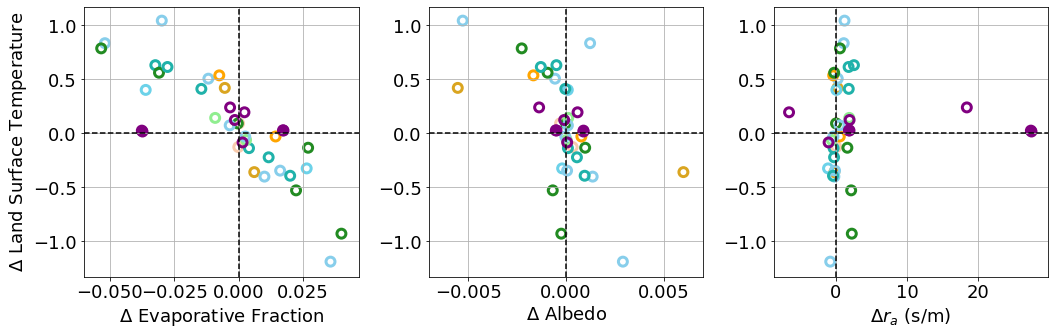

In [69]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.axvline(x=0,linestyle='--',color='k')
plt.axhline(y=0,linestyle='--',color='k')
for i, d in enumerate(df.EF):
    plt.scatter(df.EF[i], df.Ts[i],s=80,facecolors='none',linewidths=3, color=colors[i])
    if i>33:
        plt.scatter(df.EF[i], df.Ts[i],s=80,linewidths=3, color=colors[i])
plt.grid()
plt.xlabel('$\Delta$ Evaporative Fraction')
plt.ylabel('$\Delta$ Land Surface Temperature')

plt.subplot(1,3,2)
plt.axvline(x=0,linestyle='--',color='k')
plt.axhline(y=0,linestyle='--',color='k')
for i, d in enumerate(df.albedo):
    plt.scatter(df.albedo[i], df.Ts[i],s=80,facecolors='none',linewidths=3, color=colors[i])
    if i>33:
        plt.scatter(df.albedo[i], df.Ts[i],s=80,linewidths=3, color=colors[i])
plt.grid()
plt.xlim([-0.007,0.007])
plt.xlabel('$\Delta$ Albedo')

plt.subplot(1,3,3)
plt.axvline(x=0,linestyle='--',color='k')
plt.axhline(y=0,linestyle='--',color='k')
for i, d in enumerate(df.ra):
    plt.scatter(df.ra[i], df.Ts[i],s=80,facecolors='none',linewidths=3, color=colors[i])
    if i>33:
        plt.scatter(df.ra[i], df.Ts[i],s=80,linewidths=3, color=colors[i])
plt.grid()

plt.xlabel('$\Delta r_a$ (s/m)')
plt.tight_layout()

<xarray.DataArray (ensemble_key: 36)>
array([ 1.980628e-01, -2.430291e-01, -2.374623e-01,  1.189182e+00,
       -8.214214e-01,  2.387400e-01,  4.497602e-02, -1.131907e+00,
        1.078152e+00, -1.469735e-01, -5.416100e-03,  3.321514e-02,
        2.122388e+00, -1.485270e-03,  1.785354e+00, -3.480288e-01,
       -4.319773e-01,  2.514068e+00, -2.800756e-01,  5.496712e-01,
        1.590702e+00, -4.067461e-01,  5.234171e-01,  1.852069e+00,
       -6.093350e-01, -2.657363e-01,  1.762412e+00,  2.212892e+00,
        4.934935e-01, -3.720536e-01,  1.899252e+00, -1.051381e+00,
        1.839238e+01, -6.613685e+00,  1.799401e+00,  2.740289e+01])
Coordinates:
  * ensemble_key  (ensemble_key) object '0001' '0037' '0007' ... '0011' '0012'

In [52]:
lm.rsquared
#all 0.8494149778886609
# remove EF = 0.3229323408804433
# remove albedo = 0.76
# remove ra = 0.831063
# EF only = 0.73865
# ra only = 0.0081
# albedo only = 0.319

# albedo: 
0.319 (only)
0.089 (marginal)

# EF:
0.73865 (only)
0.526 (marginal)

#ra
0.008 (only)
0.018 (marginal)

0.8494149778886609

In [66]:
0.8494149778886609-0.8310636913762021

0.018351286512458875

In [67]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

lm = ols('Ts ~ ra -1',df).fit()
lm.params
lm.rsquared

0.008166937282046871

In [36]:
lm = ols('Ts ~ albedo + EF + ra -1',df).fit()
anova_table = anova_lm(lm)

NameError: name 'ols' is not defined

In [116]:
var = 'HTOP'
lm = ols('Ts ~ albedo + EF + ra -1',df).fit()
anova_table = anova_lm(lm)
print(np.round(anova_table.loc[var,'sum_sq'] / anova_table['sum_sq'].sum(),4))
lm = ols('Ts ~ albedo + HTOP + EF -1',df).fit()
anova_table = anova_lm(lm)
print(np.round(anova_table.loc[var,'sum_sq'] / anova_table['sum_sq'].sum(),4))
lm = ols('Ts ~ HTOP + EF + albedo -1',df).fit()
anova_table = anova_lm(lm)
print(np.round(anova_table.loc[var,'sum_sq'] / anova_table['sum_sq'].sum(),4))
lm = ols('Ts ~ HTOP + albedo + EF -1',df).fit()
anova_table = anova_lm(lm)
print(np.round(anova_table.loc[var,'sum_sq'] / anova_table['sum_sq'].sum(),4))
lm = ols('Ts ~ EF + albedo + HTOP -1',df).fit()
anova_table = anova_lm(lm)
print(np.round(anova_table.loc[var,'sum_sq'] / anova_table['sum_sq'].sum(),4))
lm = ols('Ts ~ EF + HTOP + albedo -1',df).fit()
anova_table = anova_lm(lm)
print(np.round(anova_table.loc[var,'sum_sq'] / anova_table['sum_sq'].sum(),4))

0.0005
0.0002
0.0039
0.0039
0.0005
0.0023


In [109]:
EF, albedo, HTOP
EF, HTOP, albedo
albedo, EF, HTOP
albedo, HTOP, albedo
HTOP, EF, albedo
HTOP, albedo, EF

df    sum_sq   mean_sq           F        PR(>F)
albedo     1.0  2.564116  2.564116   62.573768  4.026527e-09
EF         1.0  4.108438  4.108438  100.260841  1.567001e-11
HTOP       1.0  0.004121  0.004121    0.100565  7.531504e-01
Residual  33.0  1.352257  0.040977         NaN           NaN

In [110]:
np.round(anova_table['sum_sq'][:-1].sum() / anova_table['sum_sq'].sum(),4)

0.8316

0.5117

In [ ]:
anova_table.loc['EF','sum_sq'] / anova_table['sum_sq'].sum()

In [ ]:

Intercept    -0.740399
x1            8.333699
x2           29.171750
x3           26.629401
x4           -1.824458

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
 
# Assume you have independent variables X and a dependent variable y
X2 = np.transpose(np.array([#GLOBAL AVERAGE OF CHANGES
                           #deltas_EF_local,
                           #delta_albedos_local,
                           #deltas_htops_local,
                           
                           # CHANGES IN GLOBAL AVERAGES
                           #deltas_EF, 
                           #deltas_albedo, 
                           #deltas_htop,
    
    
                           deltas_Ts_offline
                          ]))
y2 = deltas_Ts_coupled #delta_Ts_coupled #delta_Ts_offline#

X2=X2[:-2,:]
y2=y2[:-2]
 
# Create an instance of the LinearRegression class
reg = LinearRegression()
 
# Fit the model to the data
reg.fit(X2, y2)
 
# Print the coefficients of the model
for i in (reg.coef_):
    print(i)
    
y_pred2=reg.predict(X2)

print('R2')
print(reg.score(X2, y2))

In [ ]:
np.unique(crosswalk.param.values)

* delta_EF (0.728 alone, marginal is 0.553)
* delta_albedo (0.275 alone, marginal is 0.097)
* delta_htop (0.05 alone, marginal is 5.67e-5)

In [ ]:
['z0mr',
 'zsno',
 'upplim_destruct_metamorph',
 'rhosnir',
 'lmrha',
 'zetamaxstable',
 'nstem',
 'sand_pf',
 'tpu25ratio',
 'd_max',
 'frac_sat_soil_dsl_init',
 'jmaxb1',
 'jmaxb0',
 'maximum_leaf_wetted_fraction',
 'medlynintercept',
 'fff',
 'medlynslope',
 'kmax']

In [93]:
for i, ypredi in enumerate(y_pred):
    print(crosswalk.description.values[i])
    #print(ypredi)
    print(y_pred[i])

rhosnir, min
0.56216764
rhosnir, max
-0.6074316
d_max, min
-0.28194532
d_max, max
0.9044318
frac_sat_soil_dsl_init, min
-0.8345013
frac_sat_soil_dsl_init, max
0.24105975
maximum_leaf_wetted_fraction, min
0.5366697
maximum_leaf_wetted_fraction, max
-0.4342185
fff, min
0.74375784
fff, max
-0.29476994
upplim_destruct_metamorph, min
0.04224432
upplim_destruct_metamorph, max
-0.06007965
medlynslope, max
-0.40883744
medlynintercept, min
0.006069281
tpu25ratio, min
0.31210244
tpu25ratio, max
-0.08980602
jmaxb0, max
-0.40910658
jmaxb1, min
0.587478
jmaxb1, max
-0.25072366
kmax, min
0.950741
kmax, max
-0.39758506
nstem, min
0.3994997
nstem, max
-0.2625156
lmrha, min
0.19879076
lmrha, max
-0.067347586
medlynslope, min
0.55660975
jmaxb0, min
0.5392053
medlynintercept, max
-0.68239707
sand_pf, min
0.058667105
sand_pf, max
-0.043837085
z0mr, min
0.036356874
z0mr, max
-0.030488987
zsno, min
0.17660552
zsno, max
-0.06813663
zetamaxstable, min
-0.20579919
zetamaxstable, max
0.50251627


(-1.5, 1.5)

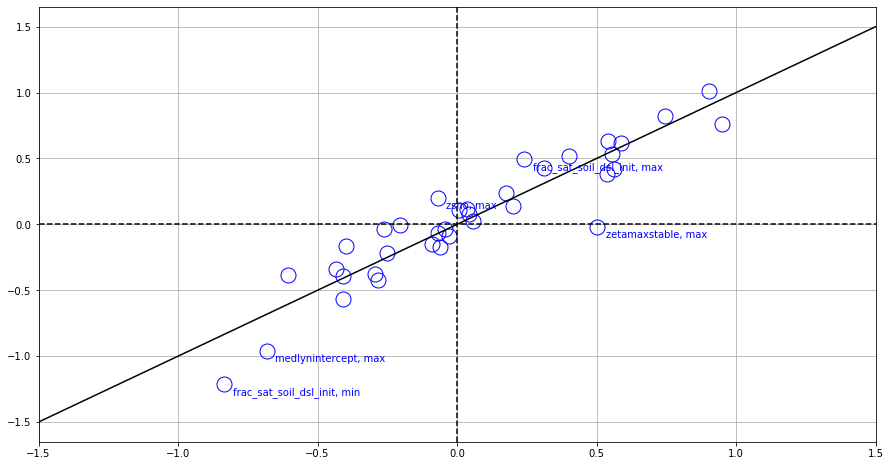

In [84]:
plt.figure(figsize=(15,8))
minval=-1.5#-0.15#np.nanmin(y_pred)*1.1
maxval=1.5# 0.2#np.nanmax(y_pred)*1.1
err=(y_pred-y)
err2=(y_pred2-y2)
#plt.plot(y_pred2, y2,'o',color='firebrick',fillstyle='none', markersize=10, label='Offline')
plt.plot(y_pred, y,'ob',fillstyle='none', markersize=15, label='Coupled')

plt.plot([minval, maxval], [minval, maxval],'-k')
plt.axvline(x=0, linestyle='--',color='k')
plt.axhline(y=0, linestyle='--',color='k')
for i, text in enumerate(crosswalk.description.values):
    if np.abs(err[i])>0.25:
        plt.text(y_pred[i]+0.03, y[i]-0.08, text,color='blue')
    #if np.abs(err2[i])>0.25:
    #    plt.text(y_pred2[i]+0.03, y2[i]-0.08, text,color='firebrick')
        #plt.text(y_pred[i], y[i], text,color='gray')
plt.grid()
plt.xlim([minval, maxval])

In [85]:
reg.coef_

array([5.6903186], dtype=float32)

(-1.5, 1.5)

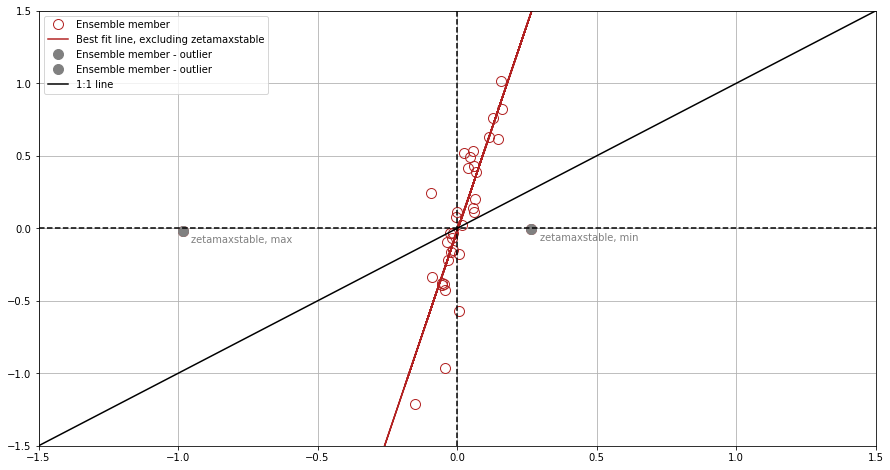

In [82]:
plt.figure(figsize=(15,8))
minval=-1.5#-0.15#np.nanmin(y_pred)*1.1
maxval=1.5# 0.2#np.nanmax(y_pred)*1.1
err=(y_pred-y)
err2=(y_pred2-y2)
plt.plot(deltas_Ts_offline, deltas_Ts_coupled,'o',color='firebrick',fillstyle='none', markersize=10, label='Ensemble member')
y_pred2=reg.predict(X2*2)
plt.plot(X2*2, y_pred2,'-',color='firebrick', label='Best fit line, excluding zetamaxstable')

#plt.plot(y_pred, y,'ob',fillstyle='none', markersize=15, label='Coupled')
for i, text in enumerate(crosswalk.description.values):
    if np.abs(deltas_Ts_offline[i])>0.25:
        plt.text(deltas_Ts_offline[i]+0.03, deltas_Ts_coupled[i]-0.08, text,color='gray')
        plt.plot(deltas_Ts_offline[i], deltas_Ts_coupled[i],'o', color='gray', markersize=10, label='Ensemble member - outlier')
    #if np.abs(err2[i])>0.25:
    #    plt.text(y_pred2[i]+0.03, y2[i]-0.08, text,color='firebrick')
        #plt.text(y_pred[i], y[i], text,color='gray')

plt.plot([minval, maxval], [minval, maxval],'-k', label='1:1 line')
plt.axvline(x=0, linestyle='--',color='k')
plt.axhline(y=0, linestyle='--',color='k')
plt.legend()
plt.grid()
plt.xlim([minval, maxval])
plt.ylim([minval, maxval])

In [ ]:
deltas_Ts_offline

In [ ]:
y_pred

# Figures

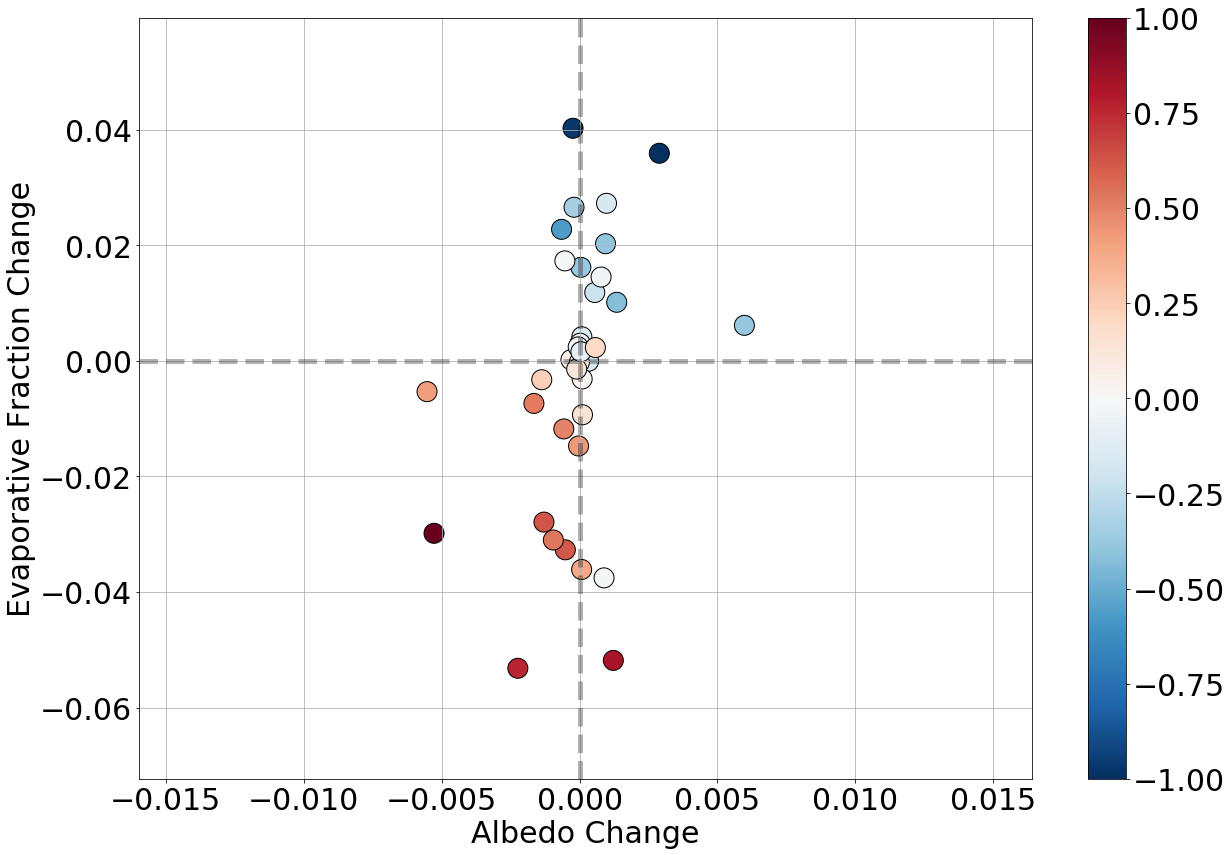

In [289]:
plt.figure(figsize=(20,14))
plt.rcParams.update({'font.size': 30})
plt.scatter(deltas_albedo,
         deltas_EF,
            c=delta_Ts, 
            cmap=plt.cm.RdBu_r, vmin=-1, vmax=1, edgecolor='k',s=400)
plt.axhline(y=0,linestyle='--',color='k',linewidth=5, alpha=0.3)
plt.axvline(x=0,linestyle='--',color='k',linewidth=5, alpha=0.3)
#for i,param in enumerate(crosswalk.param.values):
#    plt.text(delta_albedo[i],delta_EF[i],param)
"""
for i, param in enumerate(crosswalk.param.values):
    if crosswalk.description.values[i]=='zetamaxstable, max':
        plt.annotate( param,(delta_albedo[i]+0.0002,
                     delta_EF[i]-0.002), alpha=0.8)
    elif np.abs(delta_EF[i])>0.02:
        plt.annotate( param,(delta_albedo[i]+0.0002,
                     delta_EF[i]), alpha=0.8)
    elif np.abs(delta_albedo[i])>0.005:
        plt.annotate( param,(delta_albedo[i]+0.0002,
                     delta_EF[i]), alpha=0.8)
                     """
plt.ylabel('Evaporative Fraction Change')
plt.colorbar()
#plt.xlim([-0.01,0.01])
plt.grid()
plt.xlabel('Albedo Change')
plt.savefig('Albedo_vs_EF.png')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

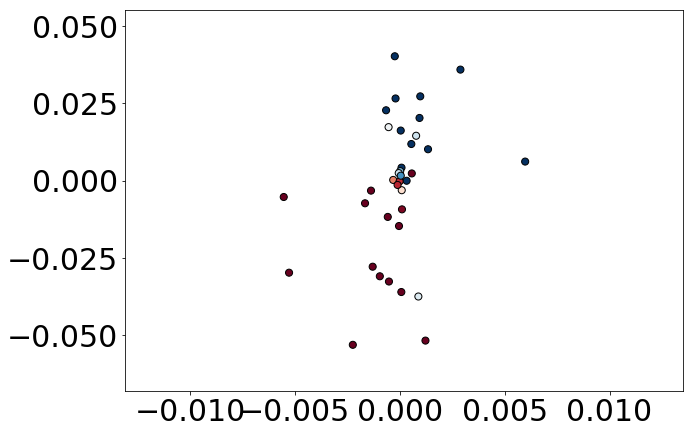

In [291]:
plt.figure(figsize=(10,7))
plt.scatter(deltas_albedo,
         deltas_EF,
            c=delta_Ts, 
            cmap=plt.cm.RdBu_r, vmin=-0.15, vmax=0.15, edgecolor='k',s=50)
#for i,param in enumerate(crosswalk.param.values):
#    plt.text(delta_albedo[i],delta_EF[i],param)
for i, param in enumerate(crosswalk.param.values):
    if crosswalk.description.values[i]=='zetamaxstable, max':
        plt.annotate( param,(delta_albedo[i]+0.0002,
                     delta_EF[i]-0.002), alpha=0.8)
    elif np.abs(delta_EF[i])>0.02:
        plt.annotate( param,(delta_albedo[i]+0.0002,
                     delta_EF[i]), alpha=0.8)
    elif np.abs(delta_albedo[i])>0.005:
        plt.annotate( param,(delta_albedo[i]+0.0002,
                     delta_EF[i]), alpha=0.8)
plt.axhline(y=0,linestyle='--',color='k', alpha=0.3)
plt.axvline(x=0,linestyle='--',color='k', alpha=0.3)
plt.ylabel('Evaporative Fraction Change')
plt.colorbar()
plt.xlim([-0.01,0.01])
plt.grid()
plt.xlabel('Albedo Change')

Text(0, 0.5, 'Temperature Change')

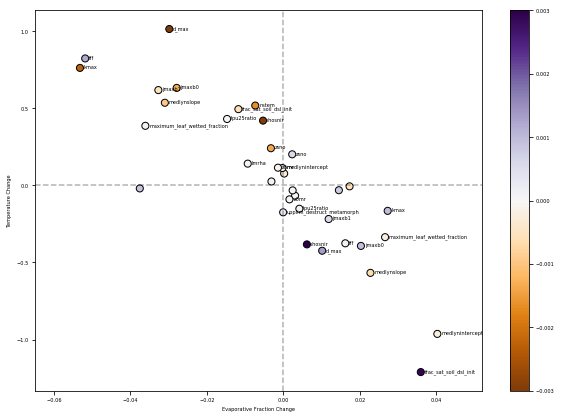

In [295]:
plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 5})
plt.scatter(
         deltas_EF,
            delta_Ts, 
    c=deltas_albedo,
            cmap=plt.cm.PuOr, vmin=-0.003, vmax=0.003, edgecolor='k',s=50)
for i, param in enumerate(crosswalk.param.values):
    if crosswalk.description.values[i]in ['zsno, max','zsno, min',
                                         'z0mr, max']:
        plt.annotate( param,(delta_EF[i]+0.001,
                     delta_Ts[i]-0.005))
    elif np.abs(delta_Ts[i])>0.1:
        plt.annotate( param,(delta_EF[i]+0.001,
                     delta_Ts[i]-0.005))
#for i,param in enumerate(crosswalk.param.values):
#    plt.text(delta_albedo[i],delta_EF[i],param)
plt.axhline(y=0,linestyle='--',color='k', alpha=0.3)
plt.axvline(x=0,linestyle='--',color='k', alpha=0.3)
plt.xlabel('Evaporative Fraction Change')
plt.colorbar()
plt.ylabel('Temperature Change')

In [ ]:
EF changes 

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(
         delta_albedo,
            delta_Ts, 
    c=delta_EF,
            cmap=plt.cm.PuOr, vmin=-0.01, vmax=0.01, edgecolor='k',s=50)
for i, param in enumerate(crosswalk.param.values):
    if np.abs(delta_albedo[i])>0.003:
        plt.annotate( param,(delta_albedo[i]+0.0001,
                     delta_Ts[i]-0.005))
    elif np.abs(delta_Ts[i])>0.1:
        plt.annotate( param,(delta_albedo[i]+0.0001,
                     delta_Ts[i]-0.005))
#for i,param in enumerate(crosswalk.param.values):
#    plt.text(delta_albedo[i],delta_EF[i],param)
plt.axhline(y=0,linestyle='--',color='k', alpha=0.3)
plt.axvline(x=0,linestyle='--',color='k', alpha=0.3)
plt.xlabel('Albedo Change')
plt.colorbar()
plt.ylabel('Temperature Change')
plt.tight_layout()

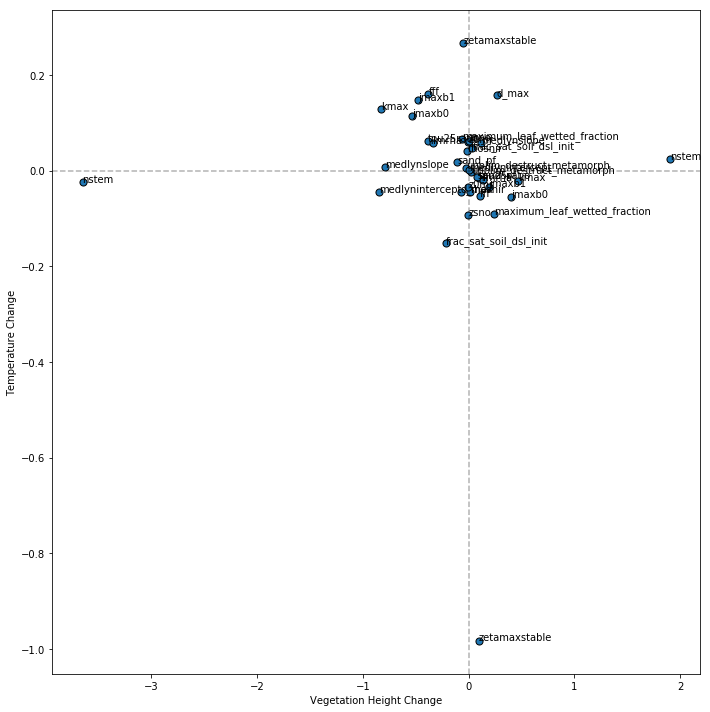

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(
         delta_htop,
            delta_Ts, edgecolor='k',s=50)
for i,param in enumerate(crosswalk.param.values):
    plt.text(delta_htop[i],delta_Ts[i],param)
plt.axhline(y=0,linestyle='--',color='k', alpha=0.3)
plt.axvline(x=0,linestyle='--',color='k', alpha=0.3)
plt.xlabel('Vegetation Height Change')
plt.ylabel('Temperature Change')
plt.tight_layout()

# Compare offline and coupled temperature

In [23]:
landweights.mean(dim=['lat','lon'])

<xarray.DataArray ()>
array(1., dtype=float32)

In [28]:
i=0
temperatures_coupled=[]
temperatures_offline=[]
for i, ds_coupled in enumerate(ensemble_coupled_Ts):
    print(i)
    ds_coupled=ensemble_coupled_Ts[i][var][60*12,:,:]
    global_land_coupled=(ds_coupled*landweights).mean(dim=['lat','lon']).load()
    ds_offline=ensemble_offline_Ts[i][var][60*12,:,:]
    global_land_offline=(ds_offline*landweights).mean(dim=['lat','lon']).load()
    temperatures_coupled.append(global_land_coupled)
    temperatures_offline.append(global_land_offline)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [36]:
ref_temp_coupled=(basecase_lnd_coupled_Ts[var][60*12,:,:]*landweights).mean(dim=['lat','lon']).load()
ref_temp_offline=(basecase_lnd_offline_Ts[var][60*12,:,:]*landweights).mean(dim=['lat','lon']).load()

In [45]:
np.array(temperatures_offline)[:-2]-ref_temp_offline.values

array([ 0.03488159, -0.04003906, -0.04135132,  0.14276123, -0.15246582,
        0.04180908,  0.05307007, -0.07373047,  0.1126709 , -0.03741455,
       -0.019104  ,  0.02902222, -0.00247192,  0.00112915,  0.00964355,
       -0.00692749, -0.03448486,  0.07254028, -0.02374268,  0.10348511,
       -0.01885986,  0.02227783, -0.03259277,  0.00537109, -0.00817871,
        0.03738403,  0.0617981 , -0.06552124,  0.01040649, -0.0105896 ,
        0.04055786, -0.02230835, -0.04043579,  0.05395508], dtype=float32)

In [52]:
x=np.array(temperatures_offline)[:-2]-ref_temp_offline.values
y=np.array(temperatures_coupled)[:-2]-ref_temp_coupled.values

In [58]:
x_reshaped=x.reshape((-1, 1))

In [73]:
model = LinearRegression().fit(x_reshaped,y)
r_sq = model.score(x_reshaped, y)
print(r_sq)

0.5817065951813438


In [61]:
r_sq

0.5817065951813438

In [62]:
model.intercept_

-0.3366982

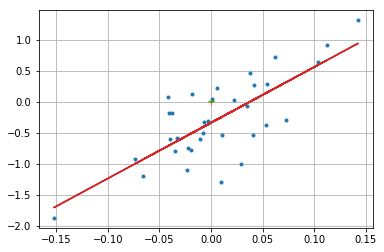

In [64]:
plt.plot(x, y
         ,'.')
plt.plot([0],[0],'+')
plt.plot([0],[ref_temp_coupled.values-ref_temp_offline.values],'+')
plt.plot(x, model.intercept_+(model.coef_*x))
plt.grid()

In [51]:
from sklearn.linear_model import LinearRegression